# Figure 6 Codes

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
current_path = os.getcwd()
parent_directory = os.path.dirname(current_path)
sys.path.append(parent_directory)  # Adds the parent directory to the Python path
from Class.jenie import Jenie
import scanpy as sc
import anndata
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Figure E

MERFISH brain projections and cell identity of 4 weeks, 1 year old control and PTBP1-ASOs with Edu

In [3]:
def plot_edu(adata, pallete, flipx=1, flipy=1, transpose=1, save=None):
    fig=(15,10)

    plt.figure(figsize=fig, facecolor="black")

    flipx = flipx
    flipy=flipy
    transpose=transpose
    sbig=5
    marker="."
    group="celltype"

    d = adata

    alkdjf = Jenie.get_pallete(pallete)

    x,y = (d.obsm['X_spatial']*[flipx,flipy])[:,::transpose].T

    for cluster in d.obs[group].unique():
        cluster_ = cluster
        inds = d.obs[group] == cluster_
        x_ = x[inds]
        y_ = y[inds]
        col = alkdjf[cluster_]
        plt.scatter(x_, y_, c=col, s=sbig, marker=marker, alpha=0.3)

    inds = d.obs["edu_pos"] == "1"
    x_ = x[inds]
    y_ = y[inds]
    col = "#05ff44"
    plt.scatter(x_, y_, c=col, s=50, marker=marker, alpha=1)

    plt.axis("off")
    plt.axis("equal")
    plt.legend()
    plt.tight_layout()

    if save:
        plt.savefig(save, transparent=True, dpi=150)

In [4]:
week4lab = sc.read('../DataF/fig6/edu/4week_mouse_edu_labeled.h5ad')
asolab = sc.read('../DataF/fig6/edu/1year_aso_labelled.h5ad')
controllab = sc.read('../DataF/fig6/edu/1year_control_labelled.h5ad')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


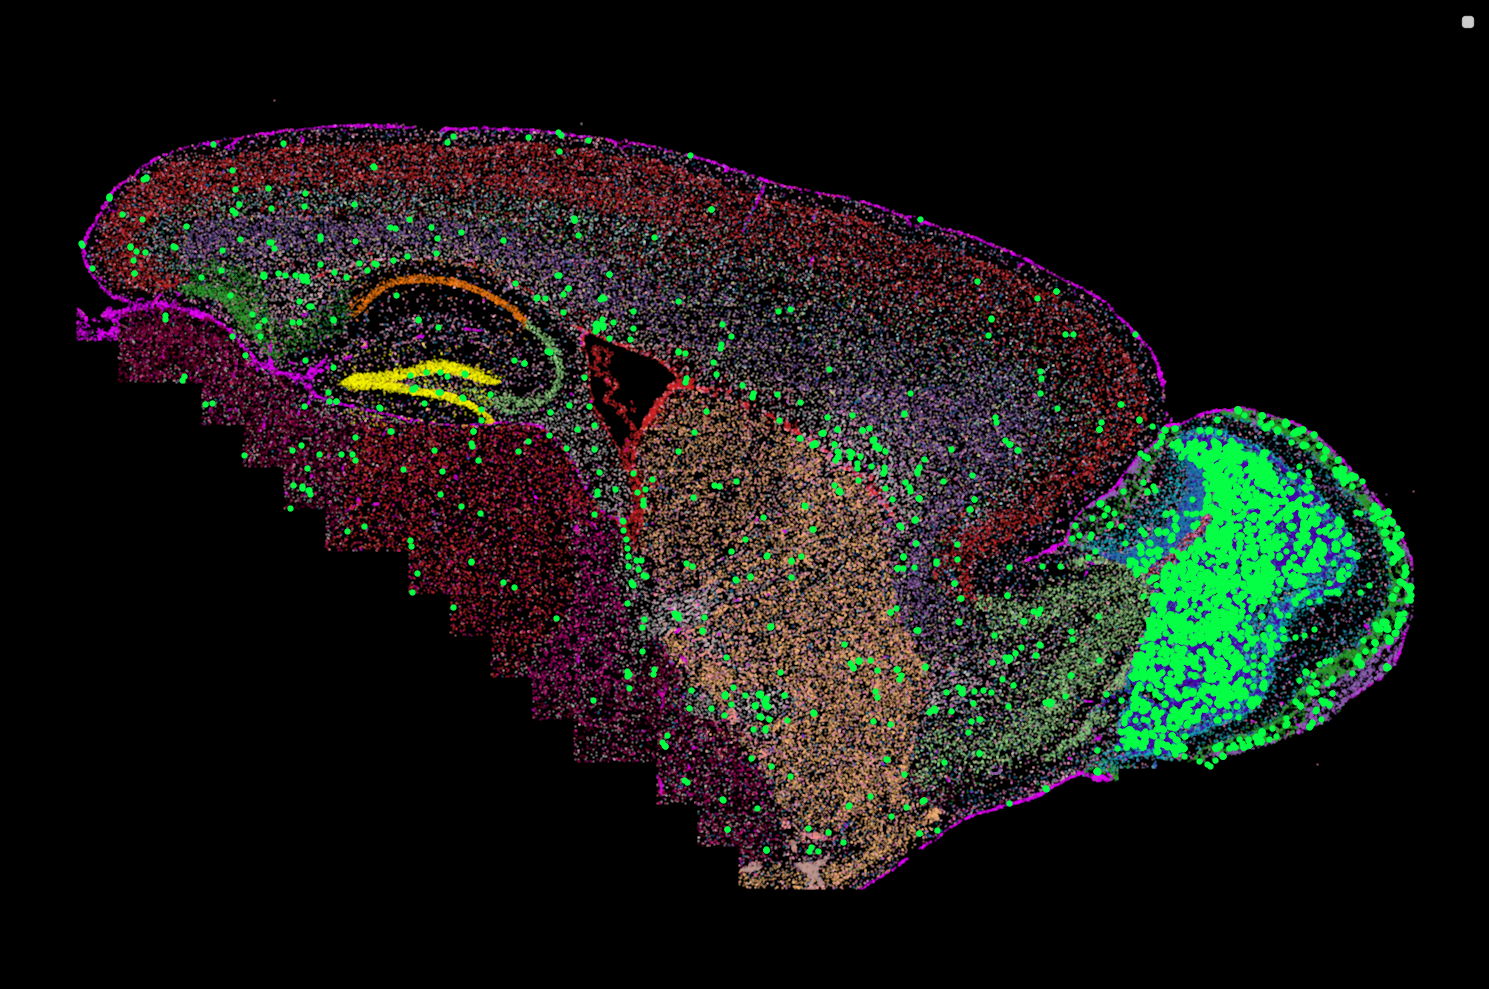

In [5]:
plot_edu(week4lab, "edu_celltype")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


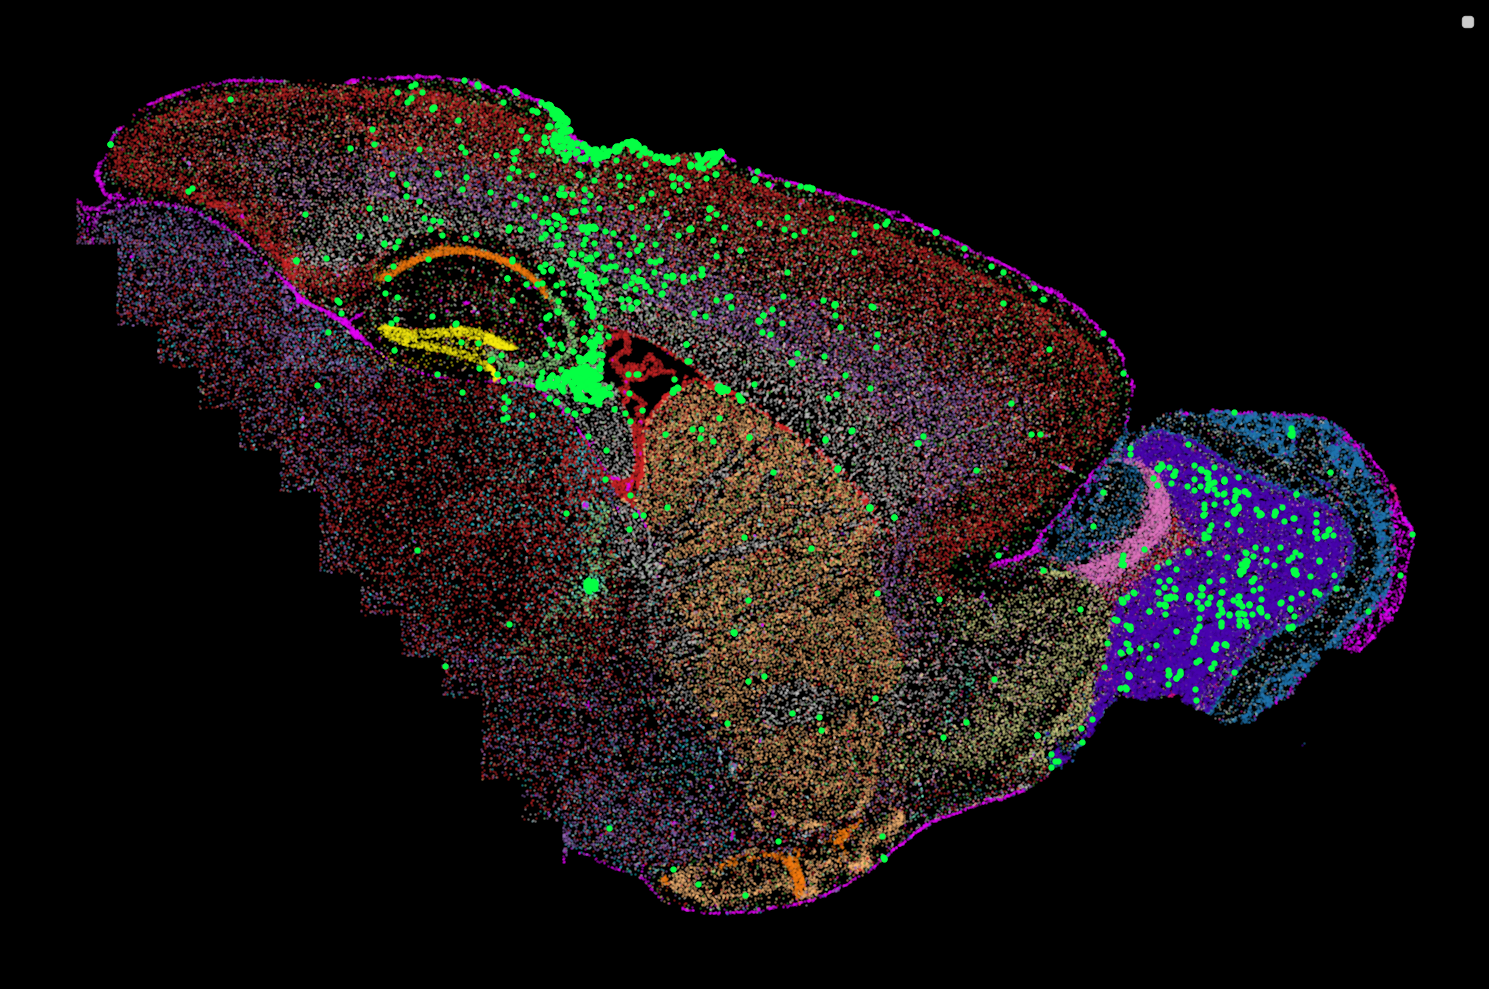

In [6]:
plot_edu(asolab, "asoedu", flipy=-1, flipx=-1)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


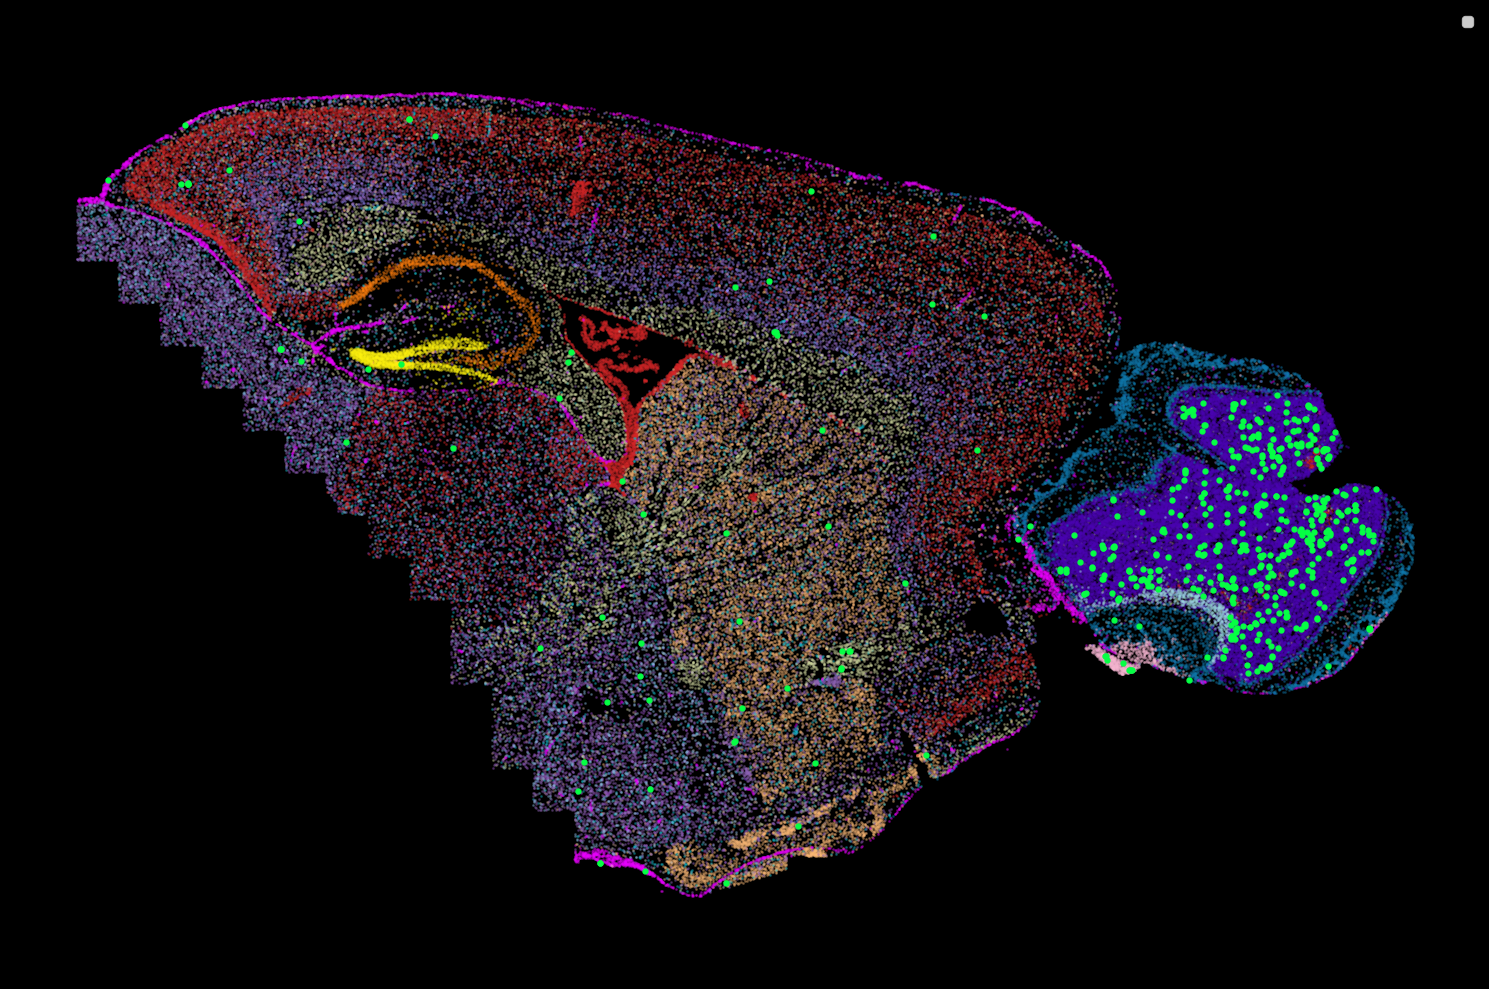

In [7]:
plot_edu(controllab, "controledu", flipy=-1, flipx=-1)


# Figure K

Dot plot between Edu+ striatal cells of 4 weeks old mice and PTBP1-ASO injected mice and Edu negative cells in 1 year old saline control

### Merge edu positive cells in 4 weeks and PTBP1-aso

In [8]:
strweek4 = week4lab[week4lab.obs["celltype"].isin(["GABAergic striatal neurons"])]
straso =  asolab[asolab.obs["celltype"].isin(["Striatal neurons"])]

strweek4.obs["treatment"] = "week4"
straso.obs["treatment"] = "aso"

strcom = anndata.concat([strweek4, straso])
strcomedupos = strcom[strcom.obs.edu_pos == "1"]

/var/folders/j6/2g6n5jcx4dz5dncsnj0mt2p40000gn/T/ipykernel_56207/2497056851.py:4: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  strweek4.obs["treatment"] = "week4"
/var/folders/j6/2g6n5jcx4dz5dncsnj0mt2p40000gn/T/ipykernel_56207/2497056851.py:5: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  straso.obs["treatment"] = "aso"
/Users/kjenie/DataspellProjects/ptb_timepoints/.conda/lib/python3.10/site-packages/anndata/_core/anndata.py:1830: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [9]:
sc.tl.rank_genes_groups(strcomedupos, "treatment")

/Users/kjenie/DataspellProjects/ptb_timepoints/.conda/lib/python3.10/site-packages/anndata/_core/anndata.py:1222: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


### Plot Dotplot

/Users/kjenie/DataspellProjects/ptb_timepoints/.conda/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


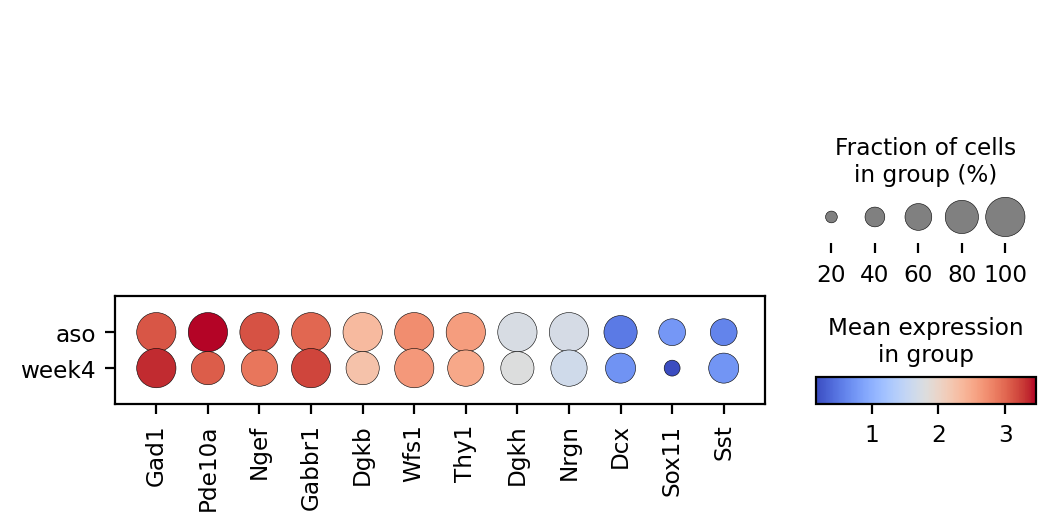

In [10]:
genes = [
    "Gad1",
    "Pde10a",
    "Ngef",
    "Gabbr1",
    "Dgkb",
    "Wfs1",
    "Thy1",
    "Dgkh",
    "Nrgn",
    "Dcx",
    "Sox11",
    "Sst"
]

sc.set_figure_params(figsize=(10,3))
plt.style.use("default")
a = sc.pl.dotplot(strcomedupos, var_names=genes, groupby="treatment", cmap="coolwarm", return_fig=False)
# a.savefig("./figures/dotplot23.png", transparent=True, dpi=300)

### Get edu positive striatal neurons in PTBP1-aso

In [11]:
strneuaso = asolab[asolab.obs["celltype"] == "Striatal neurons"]
strneuaso.uns['log1p']['base'] = None
sc.tl.rank_genes_groups(strneuaso, "edu_pos")

/Users/kjenie/DataspellProjects/ptb_timepoints/.conda/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:580: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


### Plot dotplot

/Users/kjenie/DataspellProjects/ptb_timepoints/.conda/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


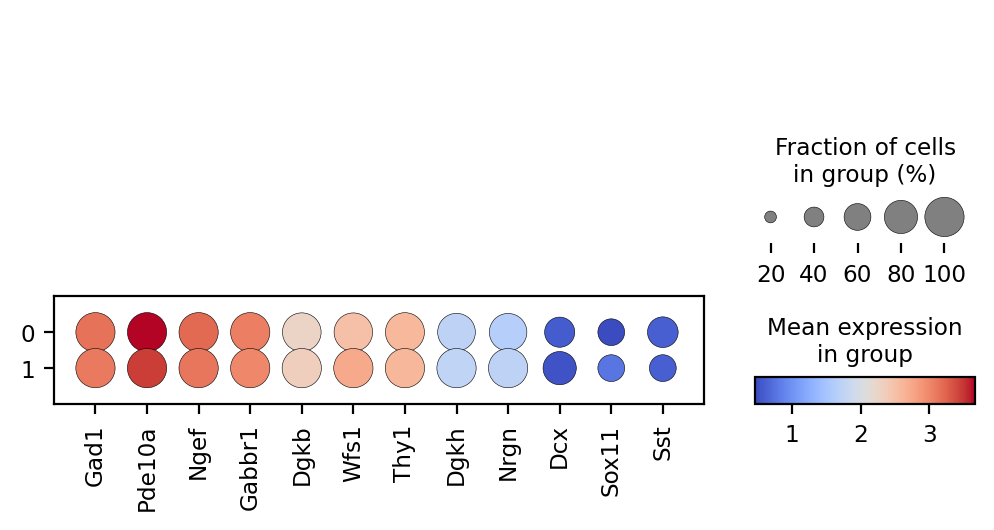

In [12]:
sc.set_figure_params(figsize=(10,3))
plt.style.use("default")
a = sc.pl.dotplot(strneuaso, groupby="edu_pos", var_names=genes, cmap="coolwarm", return_fig=False)
# a.savefig("./figures/dotplot2.png", transparent=True, dpi=300)

### PCA of Striatal neurons between 4 weeks and PTBP1-aso

In [13]:
strweek4 = week4lab[week4lab.obs["celltype"].isin(["GABAergic striatal neurons"])]
straso = asolab[asolab.obs["celltype"].isin(["Striatal neurons"])]

strweek4.obs["treatment"] = "week4"
straso.obs["treatment"] = "aso"

strcom = anndata.concat([strweek4, straso])
strcomedu = strcom[strcom.obs["edu_pos"] == "1"]

sc.tl.pca(strcomedu)

/var/folders/j6/2g6n5jcx4dz5dncsnj0mt2p40000gn/T/ipykernel_56207/2110912335.py:4: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  strweek4.obs["treatment"] = "week4"
/var/folders/j6/2g6n5jcx4dz5dncsnj0mt2p40000gn/T/ipykernel_56207/2110912335.py:5: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  straso.obs["treatment"] = "aso"
/Users/kjenie/DataspellProjects/ptb_timepoints/.conda/lib/python3.10/site-packages/anndata/_core/anndata.py:1830: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


/Users/kjenie/DataspellProjects/ptb_timepoints/.conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


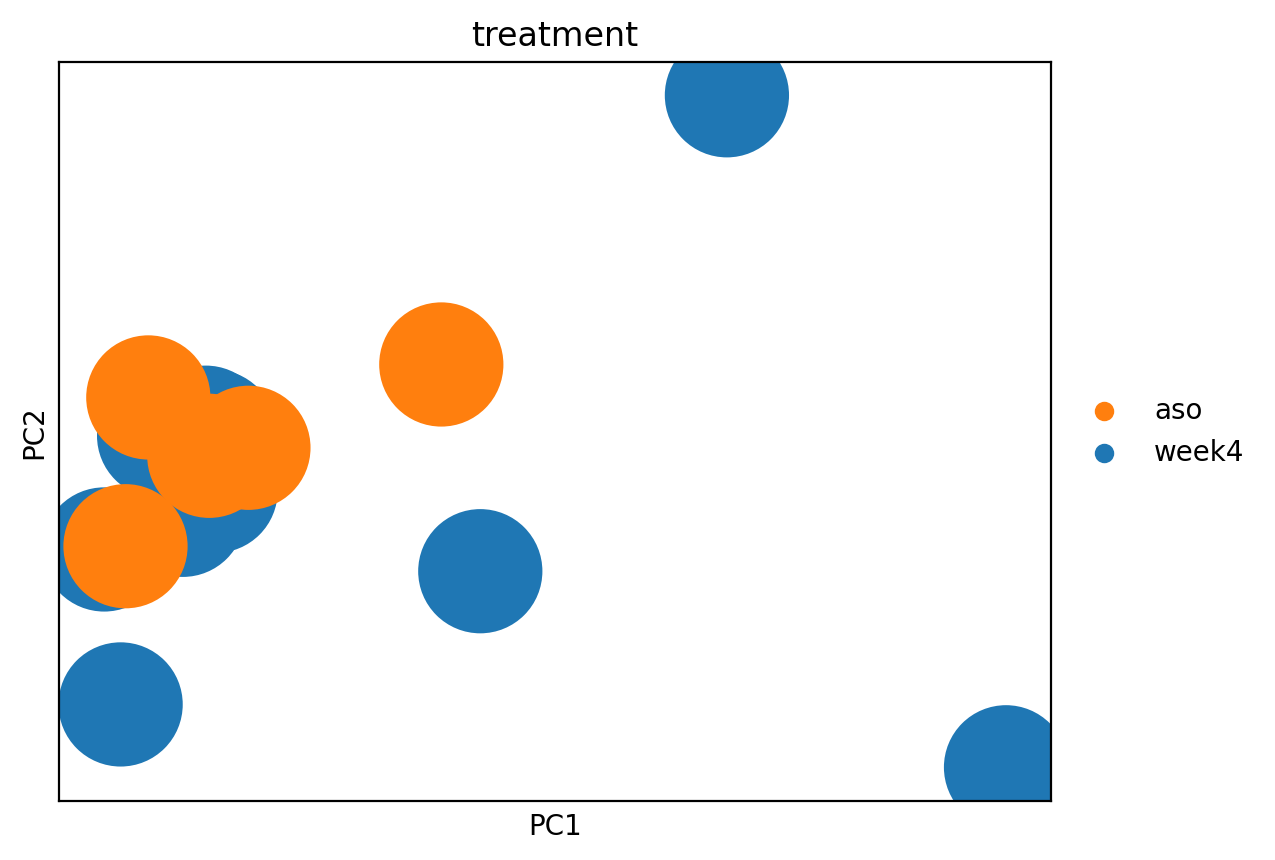

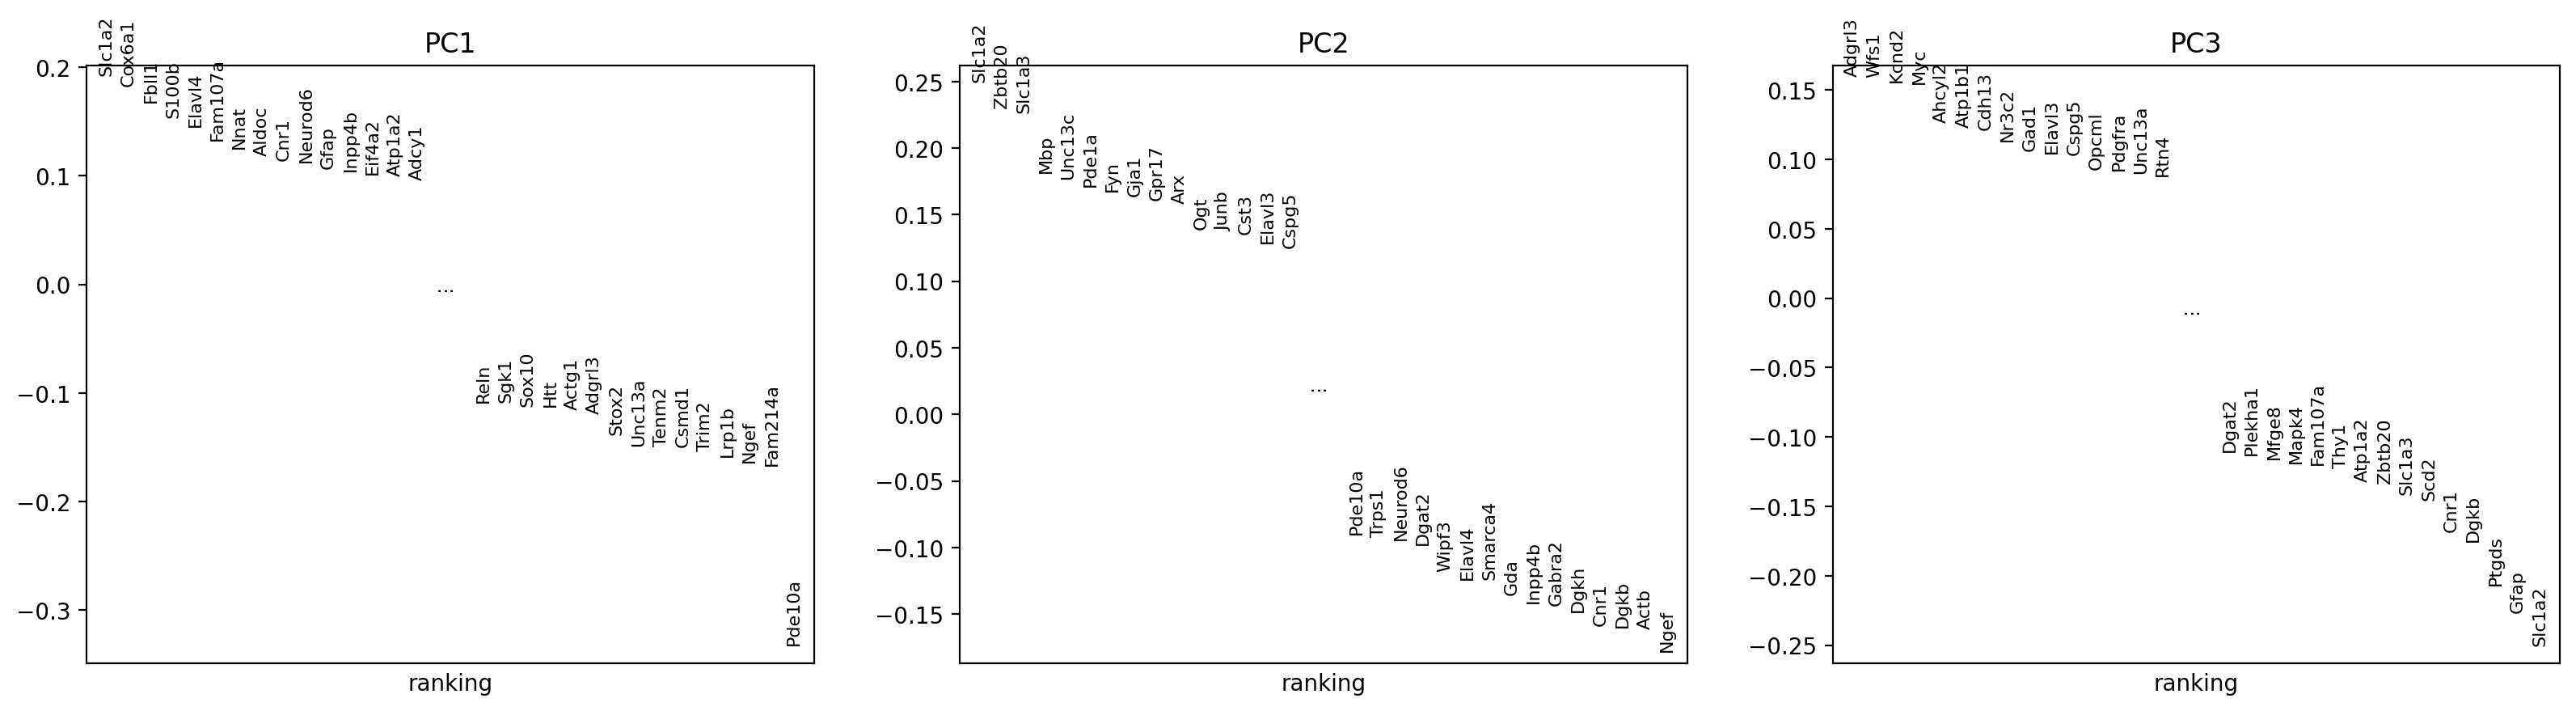

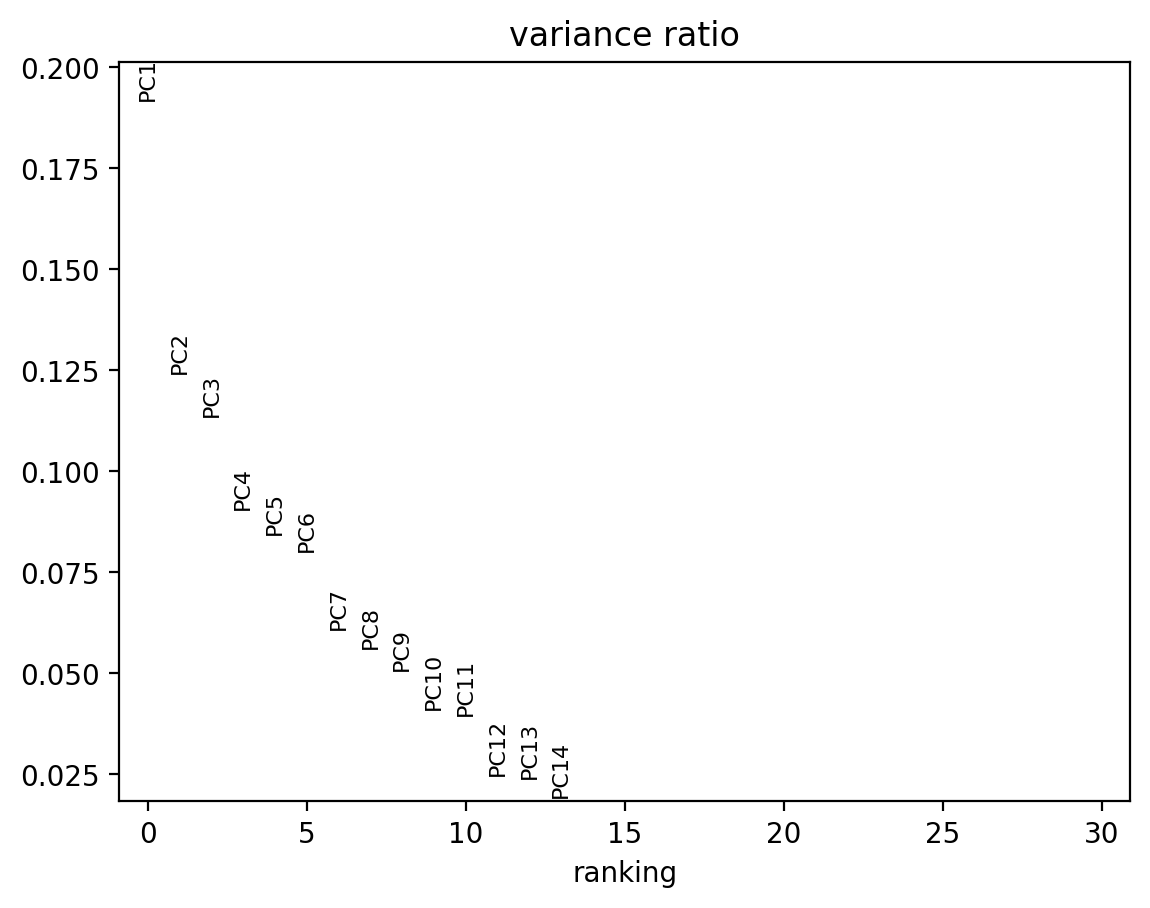

In [14]:
sc.pl.pca_overview(strcomedu, color="treatment", palette=[ "tab:orange","tab:blue"])

# Figure N, O, P

Spatial maps and PAGA analysis for gene expression profile in 1 year old saline injected 3 days, 1 week, 1 month, post PTBP1-ASO delivery. 

### Read SVZ neurogensis reference data to ingest

In [15]:
ref = sc.read("../DataF/fig5/final_reference_4week_svz.h5ad")
refumap = sc.read("../DataF/fig6/svzmoreclusters4week.h5ad")

In [16]:
neu_groups =         ["GABAergic striatum neurons",
        "Lateral ependymal",
        "Medial ependymal",
        "Stage 1",
        "Stage 2",
        "Stage 3",
        "SVZ oligos",]


### Ingest control data

In [17]:
# ingest control to svz
noninj3 = sc.read("../DataF/fig6/adatasvz_neuro_noastro_non_injected_3_31_iset1.h5ad")

d = noninj3

vars1 = list(d.var.index)
vars2 = list(ref.var.index)
varsf = np.intersect1d(vars1,vars2)
print("Genes in common:",len(varsf))
d = d[:,varsf]
ref2 = ref[:,varsf]
sc.pp.pca(d,n_comps=50)
sc.pp.pca(ref2,n_comps=50)
sc.tl.ingest(d,ref2,obs='neurogenesis_pathway')

noninj3ing = d.copy()

# subset the svz pathway
subnoninj3 = noninj3ing[noninj3ing.obs["neurogenesis_pathway"].isin(neu_groups)]

Genes in common: 275
h3
Distances type: <class 'scipy.sparse._csr.csr_matrix'>


h1


/Users/kjenie/DataspellProjects/ptb_timepoints/.conda/lib/python3.10/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/kjenie/DataspellProjects/ptb_timepoints/.conda/lib/python3.10/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/kjenie/DataspellProjects/

### Plot spatial projection

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


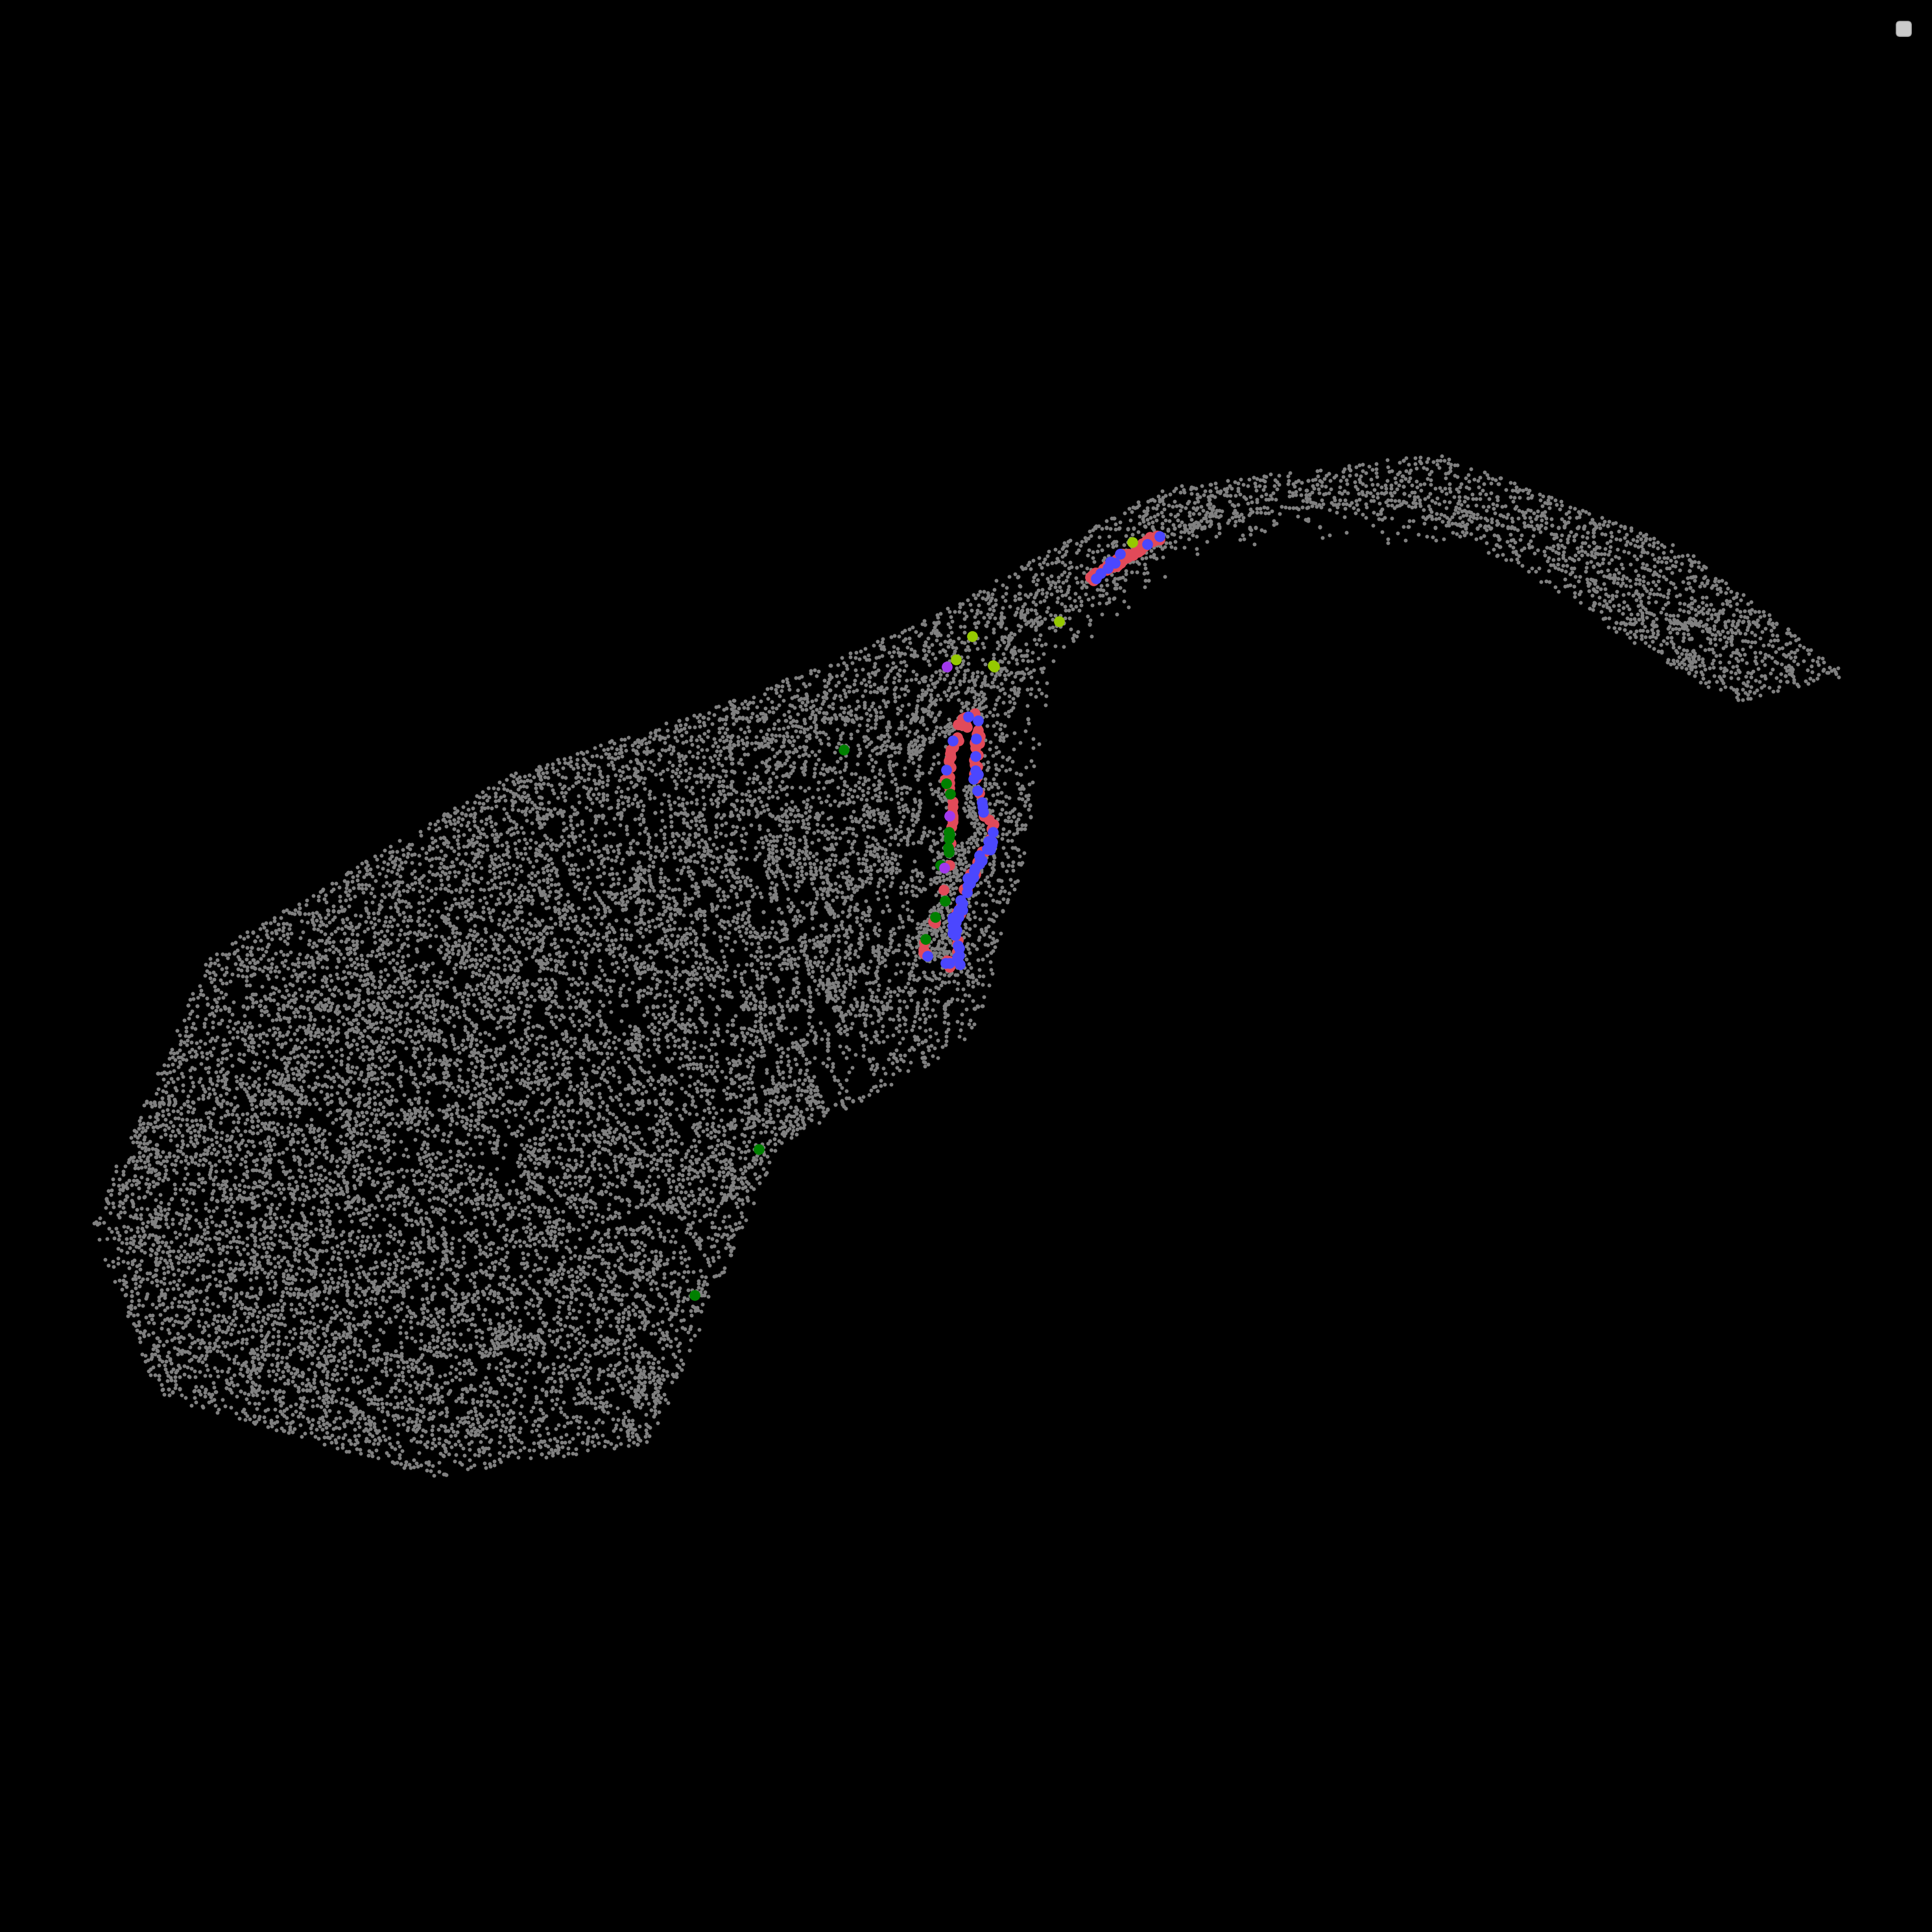

In [18]:
subnoninj3j = Jenie(subnoninj3, "subnoninj3", "subnoninj3", "neurogenesis_pathway")
subnoninj3j.plot_cluster_scdata("neurogenesis_pathway", clusters=neu_groups[1:-1], ref=noninj3, sbig=100)

### Ingest to svz neurogenesis umap reference and plot umap

In [19]:
# ingest subset svz pathway to svz umap
d = subnoninj3j.get_cluster(neu_groups[1:-1], group="neurogenesis_pathway").copy()

vars1 = list(d.var.index)
vars2 = list(refumap.var.index)
varsf = np.intersect1d(vars1,vars2)
print("Genes in common:",len(varsf))
d = d[:,varsf]
ref2 = refumap[:,varsf]
sc.pp.pca(d,n_comps=50)
sc.pp.pca(ref2,n_comps=50)
sc.tl.ingest(d,ref2,obs='leiden')

umapnoninj3ing = d.copy()

Genes in common: 275
h3
Distances type: <class 'scipy.sparse._csr.csr_matrix'>


h1


/Users/kjenie/DataspellProjects/ptb_timepoints/.conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/kjenie/DataspellProjects/ptb_timepoints/.conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:369: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/Users/kjenie/DataspellProjects/ptb_timepoints/.conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:379: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/Users/kjenie/DataspellProjects/ptb_timepoints/.conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


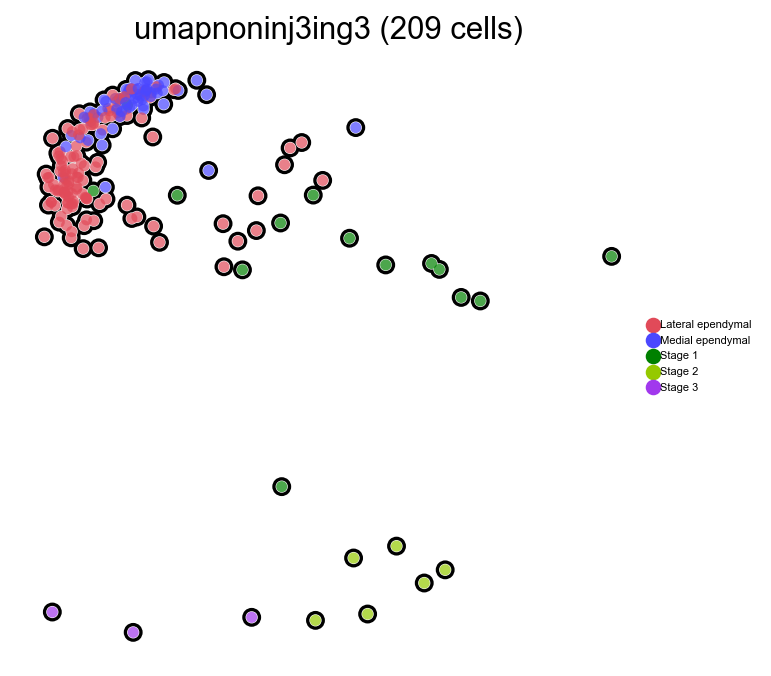

In [20]:
umapnoninj3ingj = Jenie(umapnoninj3ing, "umapnoninj3ing3", "umapnoninj3ing3", "neurogenesis_pathway")
umapnoninj3ingj.umap("neurogenesis_pathway", fig=(5,5), size=100, legend="right margin")

### PAGA analysis

In [21]:
group="neurogenesis_pathway"
path = [
 'Medial ependymal',
 'Lateral ependymal',
 'Stage 1',
 'Stage 2',
 'Stage 3',
'GABAergic striatum neurons',
 ]


gene_names = [
'Slc1a3',
'Slc2a1',
'Gfap',
'Sox9',
'Nnat',
'Sox11',
'Dlx1',
'Dlx2',
'Gad1',
'Nrgn',
'Pde10a',
'Ptbp1',
'Rest',
]     

/Users/kjenie/DataspellProjects/ptb_timepoints/.conda/lib/python3.10/site-packages/scanpy/plotting/_utils.py:430: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + '_colors'] = colors_list
/Users/kjenie/DataspellProjects/ptb_timepoints/.conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


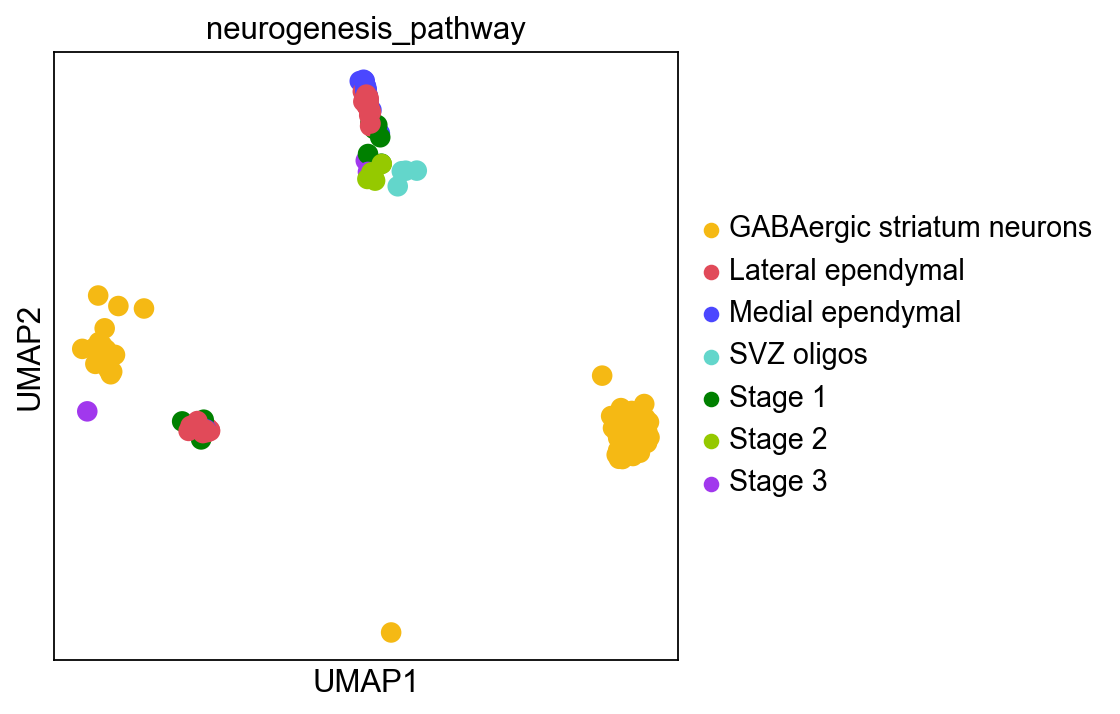

In [22]:
### NOT IN FIGURE
### only to set colors
sc.pl.umap(subnoninj3j.data, color="neurogenesis_pathway", palette=Jenie.get_pallete("neurogenesis_pathway"))

/Users/kjenie/DataspellProjects/ptb_timepoints/.conda/lib/python3.10/site-packages/scanpy/tools/_paga.py:122: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns['paga'] = {}
/Users/kjenie/DataspellProjects/ptb_timepoints/.conda/lib/python3.10/site-packages/scanpy/neighbors/__init__.py:924: RuntimeWarning: divide by zero encountered in divide
  Q = scipy.sparse.spdiags(1.0 / q, 0, W.shape[0], W.shape[0])
/Users/kjenie/DataspellProjects/ptb_timepoints/.conda/lib/python3.10/site-packages/scanpy/neighbors/__init__.py:934: RuntimeWarning: divide by zero encountered in divide
  self.Z = scipy.sparse.spdiags(1.0 / z, 0, K.shape[0], K.shape[0])
/Users/kjenie/DataspellProjects/ptb_timepoints/.conda/lib/python3.10/site-packages/scanpy/plotting/_tools/paga.py:1229: UserWarning: FixedFormatter should only be used together with FixedLocator
  groups_axis.set_yticklabels(['', xlabel, ''], fontsize=ytick_fontsize)
/Users/kjenie/DataspellP

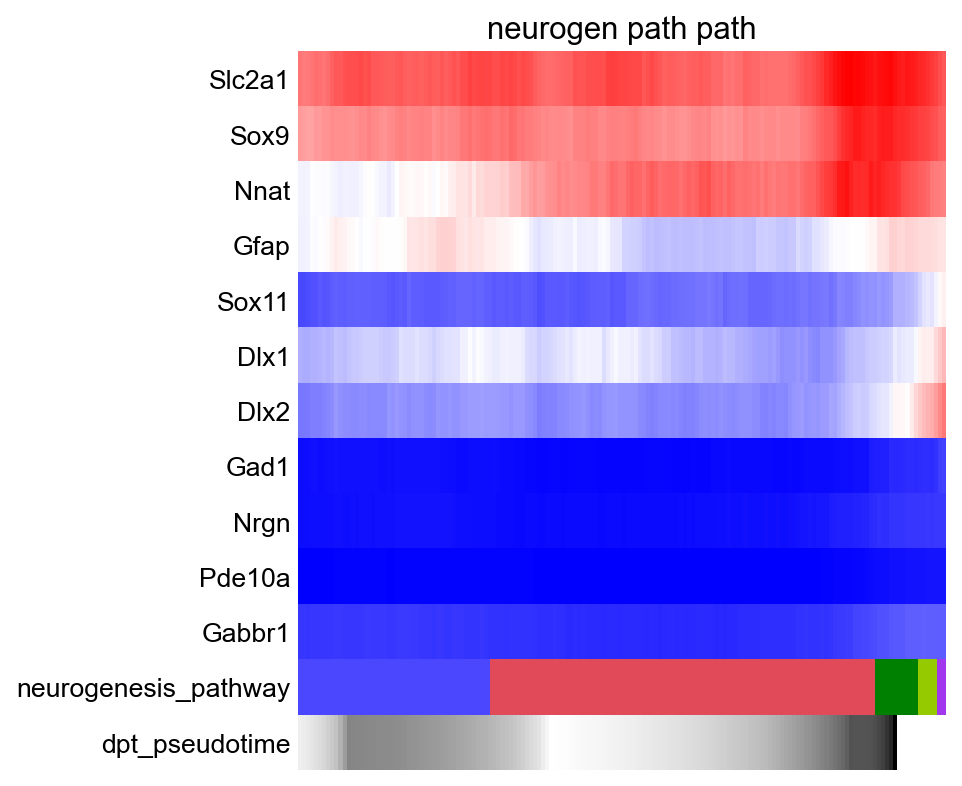

In [23]:
# paga analysis
minmaxgenes = {
    'Slc2a1': [0, 78],
    'Sox9': [0, 55],
    'Nnat': [0, 112],
    'Gfap': [0, 129],
    'Sox11': [0, 11],
    'Dlx1': [0, 5],
    'Dlx2': [0, 12],
    'Gad1': [0, 24],
    'Nrgn': [0, 45],
    'Pde10a': [0, 222],
    'Gabbr1': [0, 73]
 }

gene_names = list(minmaxgenes.keys())

     

d = subnoninj3j.data.copy()



in_path = np.in1d(d.obs[group],path)
locs = [d.var.index.get_loc(gene) for gene in gene_names]
#Ns = np.sum(d.obsm["X_raw"][in_path],axis=-1)[:,np.newaxis]
#rawcellgenes = d.obsm["X_raw"][in_path][:,locs]/Ns*np.median(Ns)
#rawcellgenes = d.obsm["X_raw"][in_path][:,locs]
# vol = d.obsm['volume'][in_path]
rawcellgenes = d.obsm["X_raw"][in_path][:,:]
# rawcellgenes = rawcellgenes/vol*np.median(vol) ### norm by volume
# Ns = np.sum(rawcellgenes,axis=-1)[:,np.newaxis]
#rawcellgenes = rawcellgenes/Ns*np.median(Ns) ### norm by total counts
rawcellgenes = rawcellgenes[:,locs]

normcellgenes = d.obsm["X_raw"][in_path][:,locs]


for ign in range(rawcellgenes.shape[1]):
    gn = gene_names[ign]
    min_,max_ = minmaxgenes[gn]
    normcellgenes[:,ign] = np.clip((rawcellgenes[:,ign] - min_)/(max_-min_),0,1)


d = d[in_path]
d = d[:, gene_names]

d.X = normcellgenes#np.exp(d.X)-1


descr = 'neurogen path'

sc.tl.paga(d, groups=group)
sc.tl.diffmap(d)
d.uns['iroot'] = np.flatnonzero(d.obs[group]  == "Medial ependymal")[1] ###############starting points
sc.tl.dpt(d)

_, data = sc.pl.paga_path(
        d, path[:-1], gene_names,
        show_node_names=False,
        ytick_fontsize=12,
        left_margin=0.15,
        n_avg=50,
        # annotations=['pseudotime'],
        show_yticks=True,
        show_colorbar=False,
        color_map='bwr',
        groups_key=group,
        color_maps_annotations={'pseudotime': 'viridis'},
        title='{} path'.format(descr),
        return_data=True,
        show=False)

### Ingest 1 week post ptb injected data

In [24]:
week1 = sc.read("../DataF/fig6/adatasvz_neuro_noastro_ptb_injected_1week.h5ad")

d = week1

vars1 = list(d.var.index)
vars2 = list(ref.var.index)
varsf = np.intersect1d(vars1,vars2)
print("Genes in common:",len(varsf))
d = d[:,varsf]
ref2 = ref[:,varsf]
sc.pp.pca(d,n_comps=50)
sc.pp.pca(ref2,n_comps=50)
sc.tl.ingest(d,ref2,obs='neurogenesis_pathway')

week1j = Jenie(d, "week1ingested", "week1ingested", "neurogenesis_pathway")

Genes in common: 278
h3
Distances type: <class 'scipy.sparse._csr.csr_matrix'>


h1


### Plot spatial projection

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


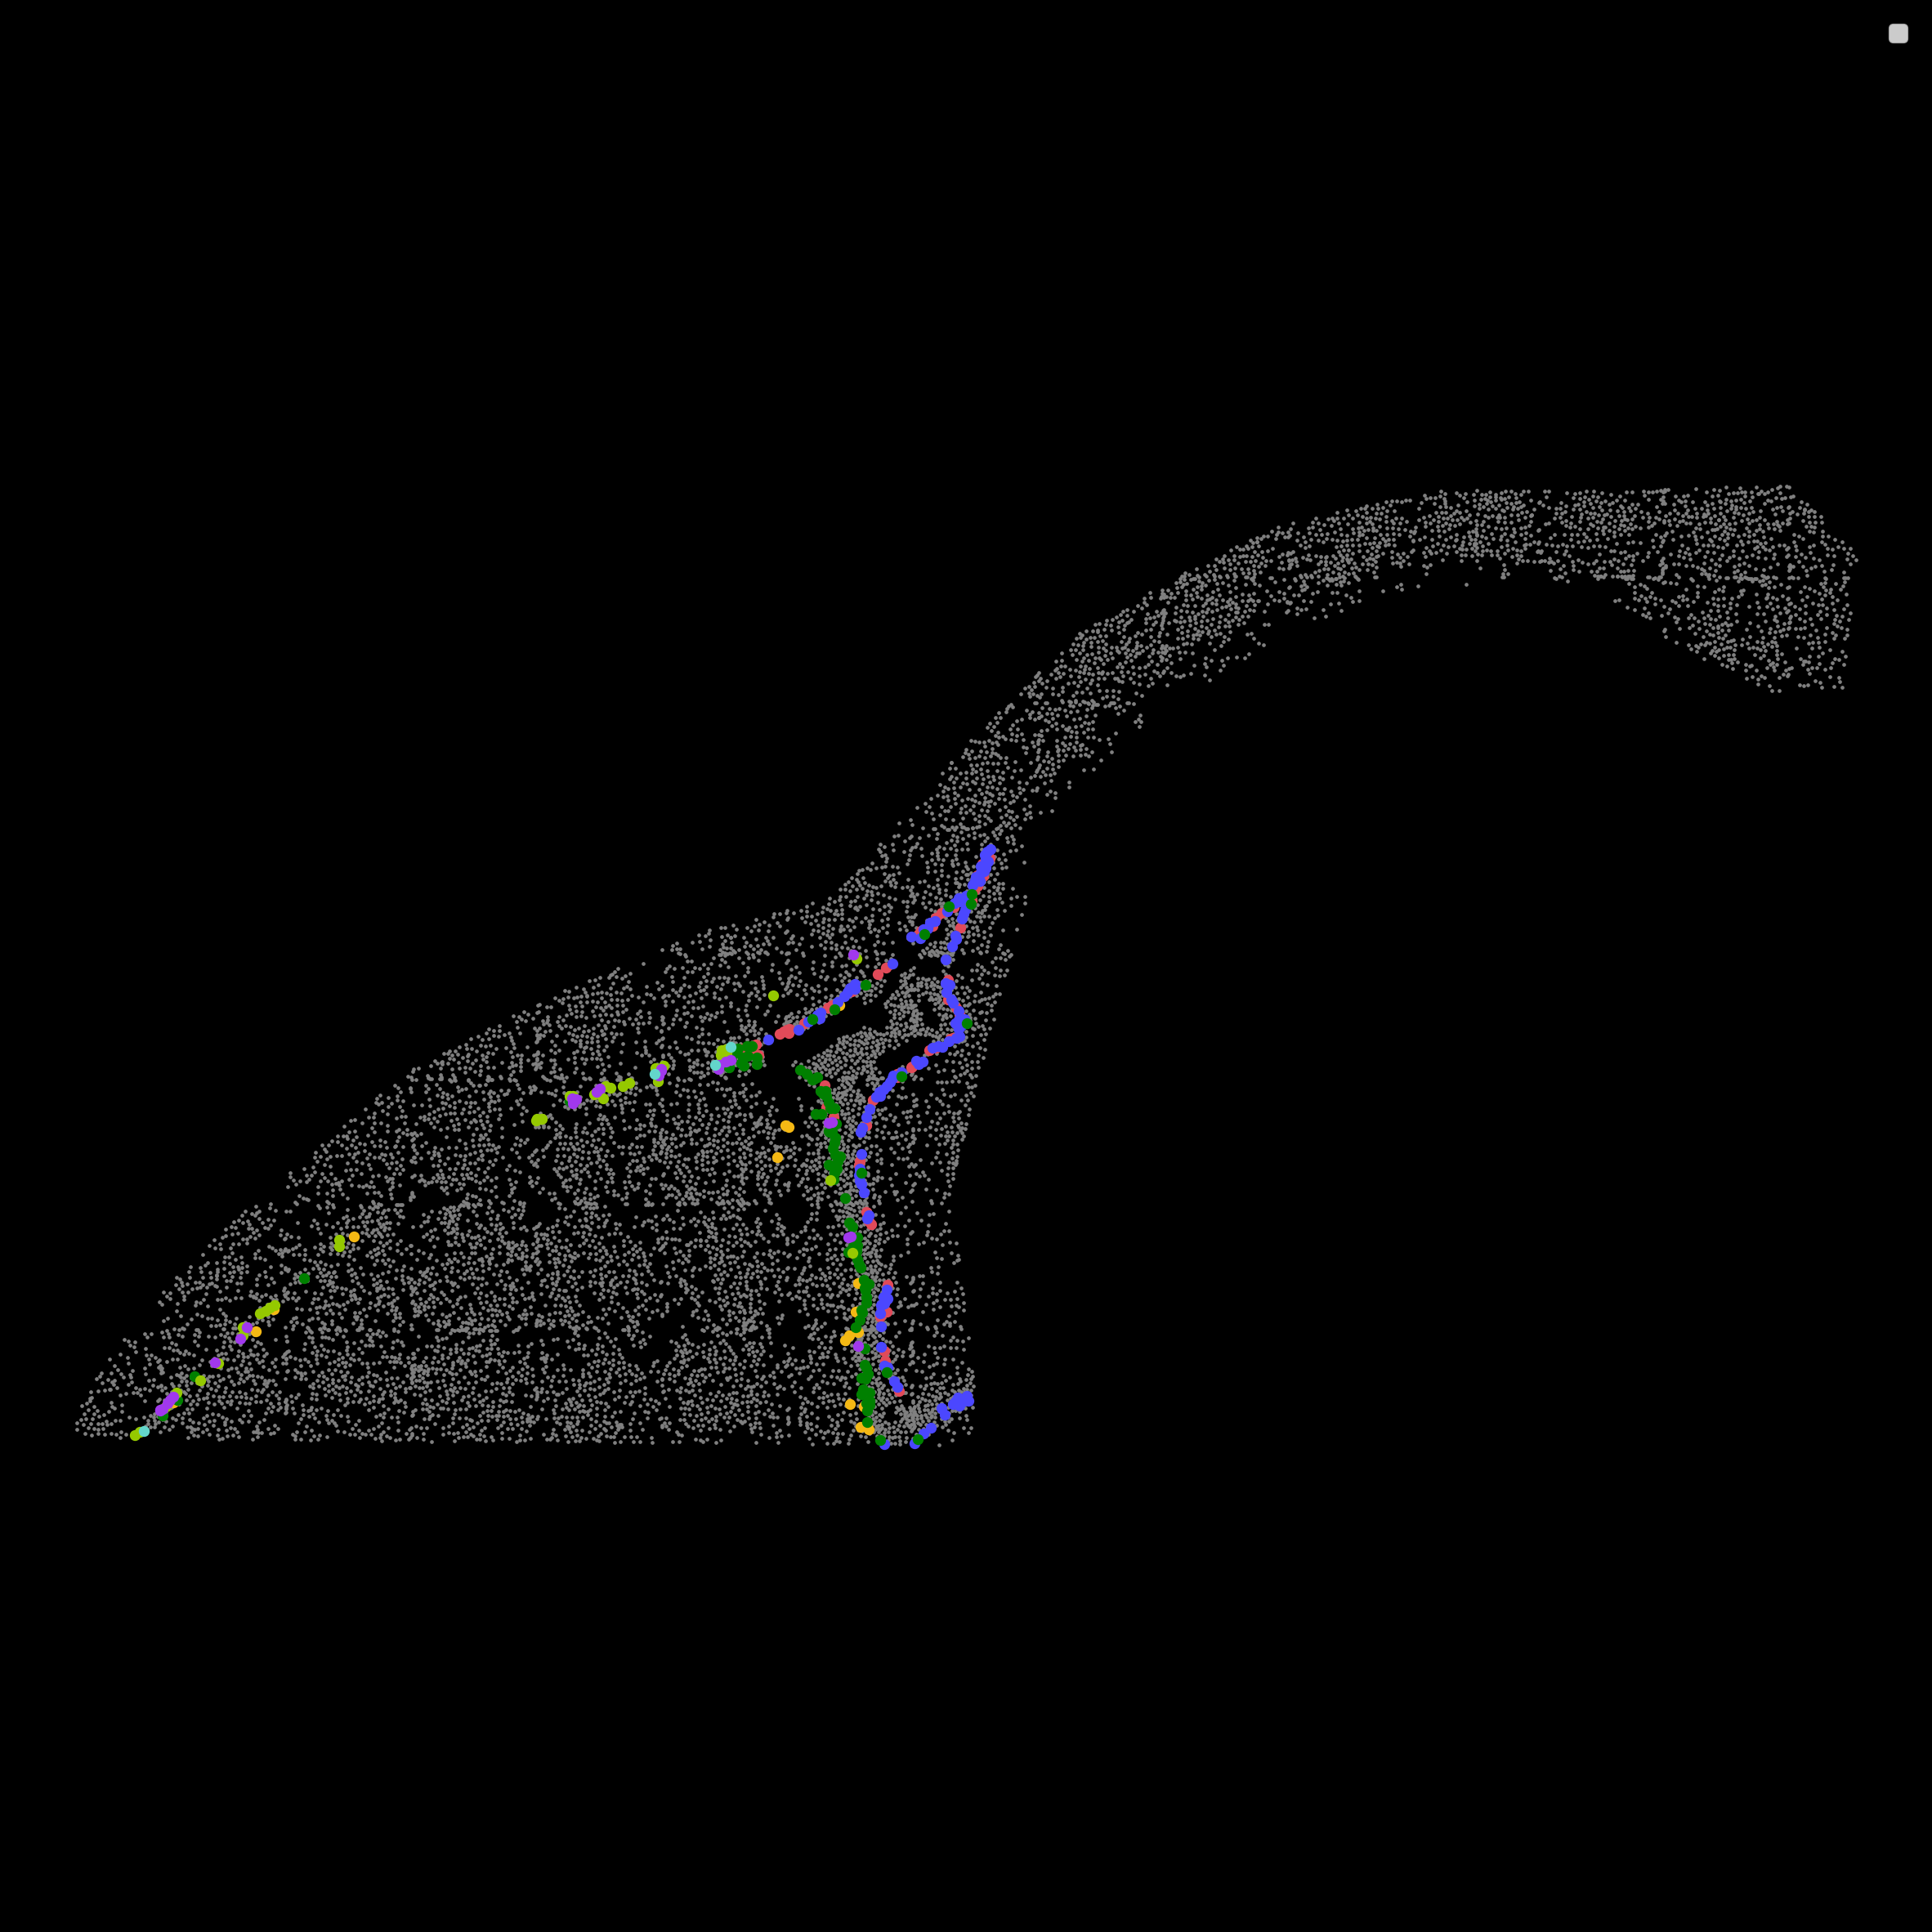

In [25]:
week1j.plot_cluster_scdata("neurogenesis_pathway", clusters=neu_groups, ref=week1, sbig=100)

### Ingest to svz neurogenesis umap reference and plot umap

In [26]:
# ingest subset svz pathway to svz umap
d = week1j.get_cluster(neu_groups, group="neurogenesis_pathway").copy()

vars1 = list(d.var.index)
vars2 = list(refumap.var.index)
varsf = np.intersect1d(vars1,vars2)
print("Genes in common:",len(varsf))
d = d[:,varsf]
ref2 = refumap[:,varsf]
sc.pp.pca(d,n_comps=50)
sc.pp.pca(ref2,n_comps=50)
sc.tl.ingest(d,ref2,obs='leiden')

week1ing = d.copy()

Genes in common: 278
h3
Distances type: <class 'scipy.sparse._csr.csr_matrix'>


h1


/Users/kjenie/DataspellProjects/ptb_timepoints/.conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/kjenie/DataspellProjects/ptb_timepoints/.conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:369: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/Users/kjenie/DataspellProjects/ptb_timepoints/.conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:379: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/Users/kjenie/DataspellProjects/ptb_timepoints/.conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


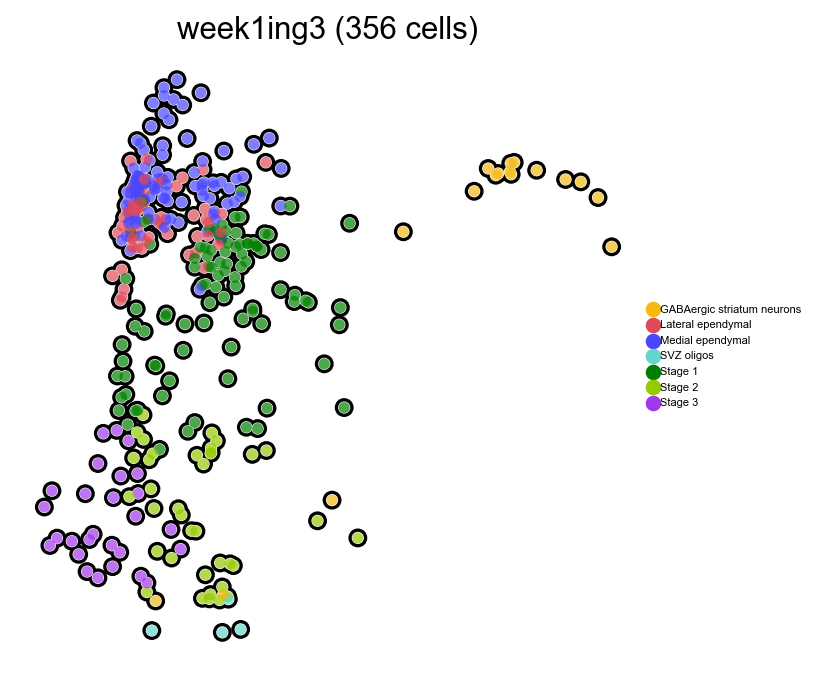

In [27]:
week1ingj = Jenie(week1ing, "week1ing3", "week1ing3", "neurogenesis_pathway")
week1ingj.umap("neurogenesis_pathway", fig=(5,5), size=100, legend="right margin")

/Users/kjenie/DataspellProjects/ptb_timepoints/.conda/lib/python3.10/site-packages/scanpy/plotting/_utils.py:430: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + '_colors'] = colors_list
/Users/kjenie/DataspellProjects/ptb_timepoints/.conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


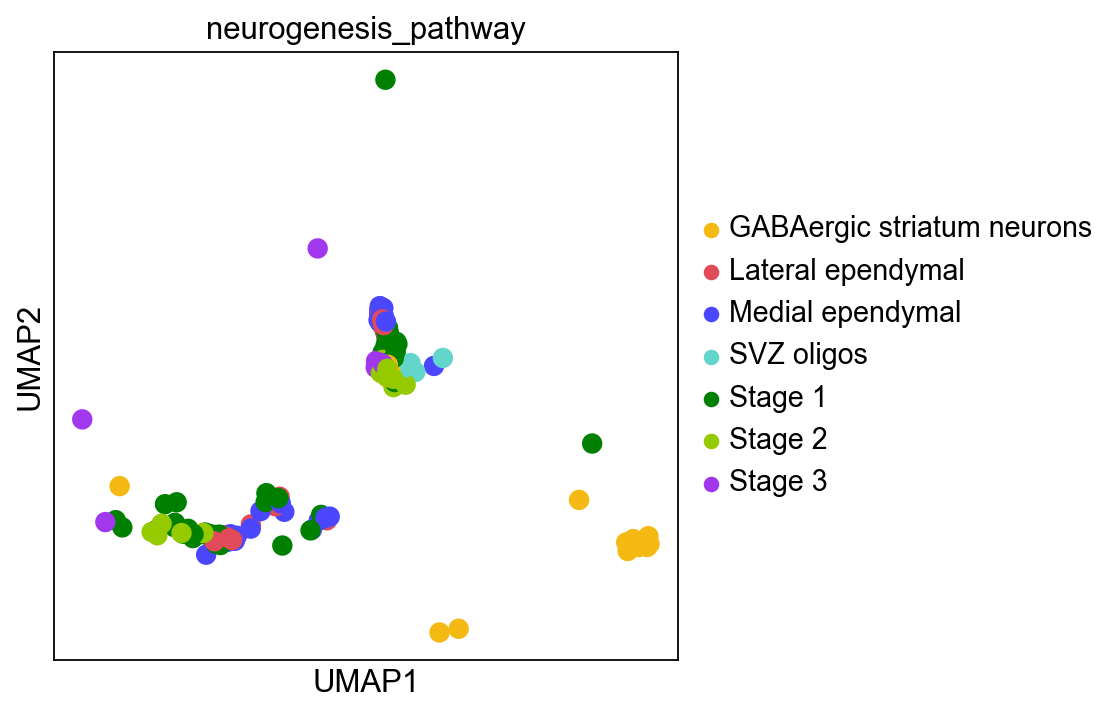

In [28]:
### NOT IN FIGURE
### only to set colors
subweek1 = week1j.data[week1j.data.obs["neurogenesis_pathway"].isin(neu_groups)]
subweek1j = Jenie(subweek1, "subweek1", "subweek1", "neurogenesis_pathway")
sc.pl.umap(subweek1j.data, color="neurogenesis_pathway", palette=Jenie.get_pallete("neurogenesis_pathway"))

/Users/kjenie/DataspellProjects/ptb_timepoints/.conda/lib/python3.10/site-packages/scanpy/tools/_paga.py:122: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns['paga'] = {}


/Users/kjenie/DataspellProjects/ptb_timepoints/.conda/lib/python3.10/site-packages/scanpy/neighbors/__init__.py:924: RuntimeWarning: divide by zero encountered in divide
  Q = scipy.sparse.spdiags(1.0 / q, 0, W.shape[0], W.shape[0])
/Users/kjenie/DataspellProjects/ptb_timepoints/.conda/lib/python3.10/site-packages/scanpy/neighbors/__init__.py:934: RuntimeWarning: divide by zero encountered in divide
  self.Z = scipy.sparse.spdiags(1.0 / z, 0, K.shape[0], K.shape[0])
/Users/kjenie/DataspellProjects/ptb_timepoints/.conda/lib/python3.10/site-packages/scanpy/_utils/__init__.py:434: RuntimeWarning: invalid value encountered in subtract
  ret[n:] = ret[n:] - ret[:-n]
/Users/kjenie/DataspellProjects/ptb_timepoints/.conda/lib/python3.10/site-packages/scanpy/plotting/_tools/paga.py:1229: UserWarning: FixedFormatter should only be used together with FixedLocator
  groups_axis.set_yticklabels(['', xlabel, ''], fontsize=ytick_fontsize)
/Users/kjenie/DataspellProjects/ptb_timepoints/.conda/lib/pyth

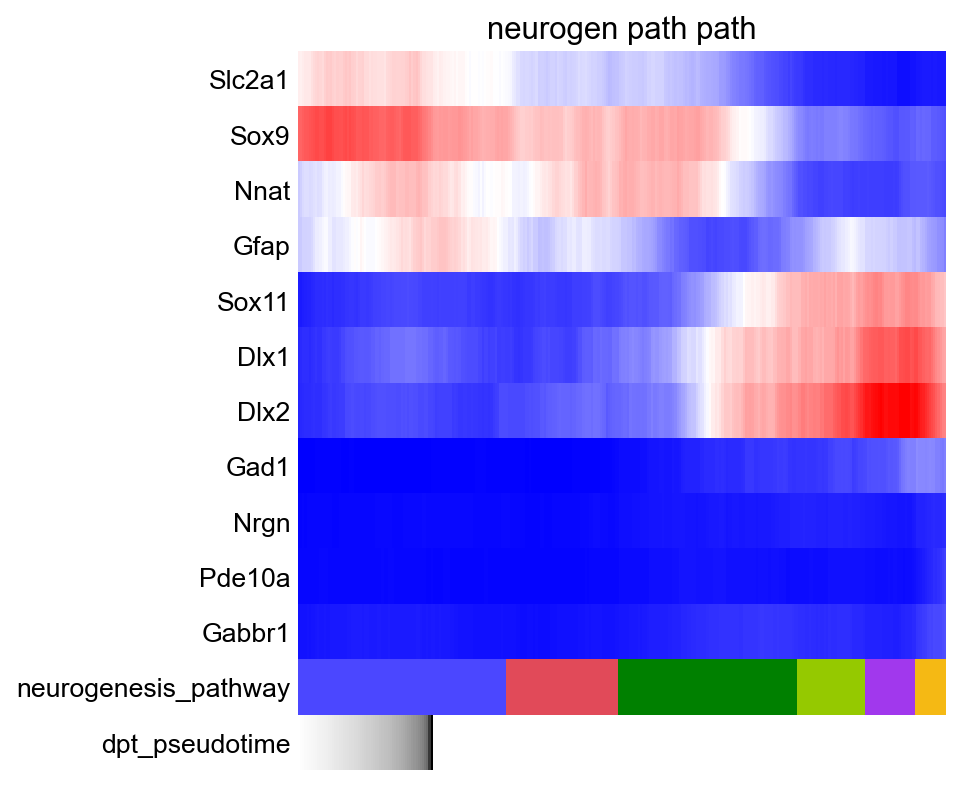

In [29]:
# paga analysis
minmaxgenes = {
    'Slc2a1': [0, 78],
    'Sox9': [0, 55],
    'Nnat': [0, 112],
    'Gfap': [0, 129],
    'Sox11': [0, 11],
    'Dlx1': [0, 5],
    'Dlx2': [0, 12],
    'Gad1': [0, 24],
    'Nrgn': [0, 45],
    'Pde10a': [0, 222],
    'Gabbr1': [0, 73]
 }

gene_names = list(minmaxgenes.keys())

     

d = subweek1j.data.copy()



in_path = np.in1d(d.obs[group],path)
locs = [d.var.index.get_loc(gene) for gene in gene_names]
#Ns = np.sum(d.obsm["X_raw"][in_path],axis=-1)[:,np.newaxis]
#rawcellgenes = d.obsm["X_raw"][in_path][:,locs]/Ns*np.median(Ns)
#rawcellgenes = d.obsm["X_raw"][in_path][:,locs]
# vol = d.obsm['volume'][in_path]
rawcellgenes = d.obsm["X_raw"][in_path][:,:]
# rawcellgenes = rawcellgenes/vol*np.median(vol) ### norm by volume
# Ns = np.sum(rawcellgenes,axis=-1)[:,np.newaxis]
#rawcellgenes = rawcellgenes/Ns*np.median(Ns) ### norm by total counts
rawcellgenes = rawcellgenes[:,locs]

normcellgenes = d.obsm["X_raw"][in_path][:,locs]


for ign in range(rawcellgenes.shape[1]):
    gn = gene_names[ign]
    min_,max_ = minmaxgenes[gn]
    normcellgenes[:,ign] = np.clip((rawcellgenes[:,ign] - min_)/(max_-min_),0,1)


d = d[in_path]
d = d[:, gene_names]

d.X = normcellgenes#np.exp(d.X)-1


descr = 'neurogen path'

sc.tl.paga(d, groups=group)
sc.tl.diffmap(d)
d.uns['iroot'] = np.flatnonzero(d.obs[group]  == "Medial ependymal")[1] ###############starting points
sc.tl.dpt(d)

_, data = sc.pl.paga_path(
        d, path, gene_names,
        show_node_names=False,
        ytick_fontsize=12,
        left_margin=0.15,
        n_avg=50,
        # annotations=['pseudotime'],
        show_yticks=True,
        show_colorbar=False,
        color_map='bwr',
        groups_key=group,
        color_maps_annotations={'pseudotime': 'viridis'},
        title='{} path'.format(descr),
        return_data=True,
        show=False)

### Ingest 1 month post ptb injected data

In [30]:
month1 = sc.read("../DataF/fig6/adatasvz_neuro_noastro_ptb_injected_1month.h5ad")

d = month1

vars1 = list(d.var.index)
vars2 = list(ref.var.index)
varsf = np.intersect1d(vars1,vars2)
print("Genes in common:",len(varsf))
d = d[:,varsf]
ref2 = ref[:,varsf]
sc.pp.pca(d,n_comps=50)
sc.pp.pca(ref2,n_comps=50)
sc.tl.ingest(d,ref2,obs='neurogenesis_pathway')

month1j = Jenie(d, "month1ingested", "month1ingested", "neurogenesis_pathway")

Genes in common: 278
h3
Distances type: <class 'scipy.sparse._csr.csr_matrix'>


h1


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


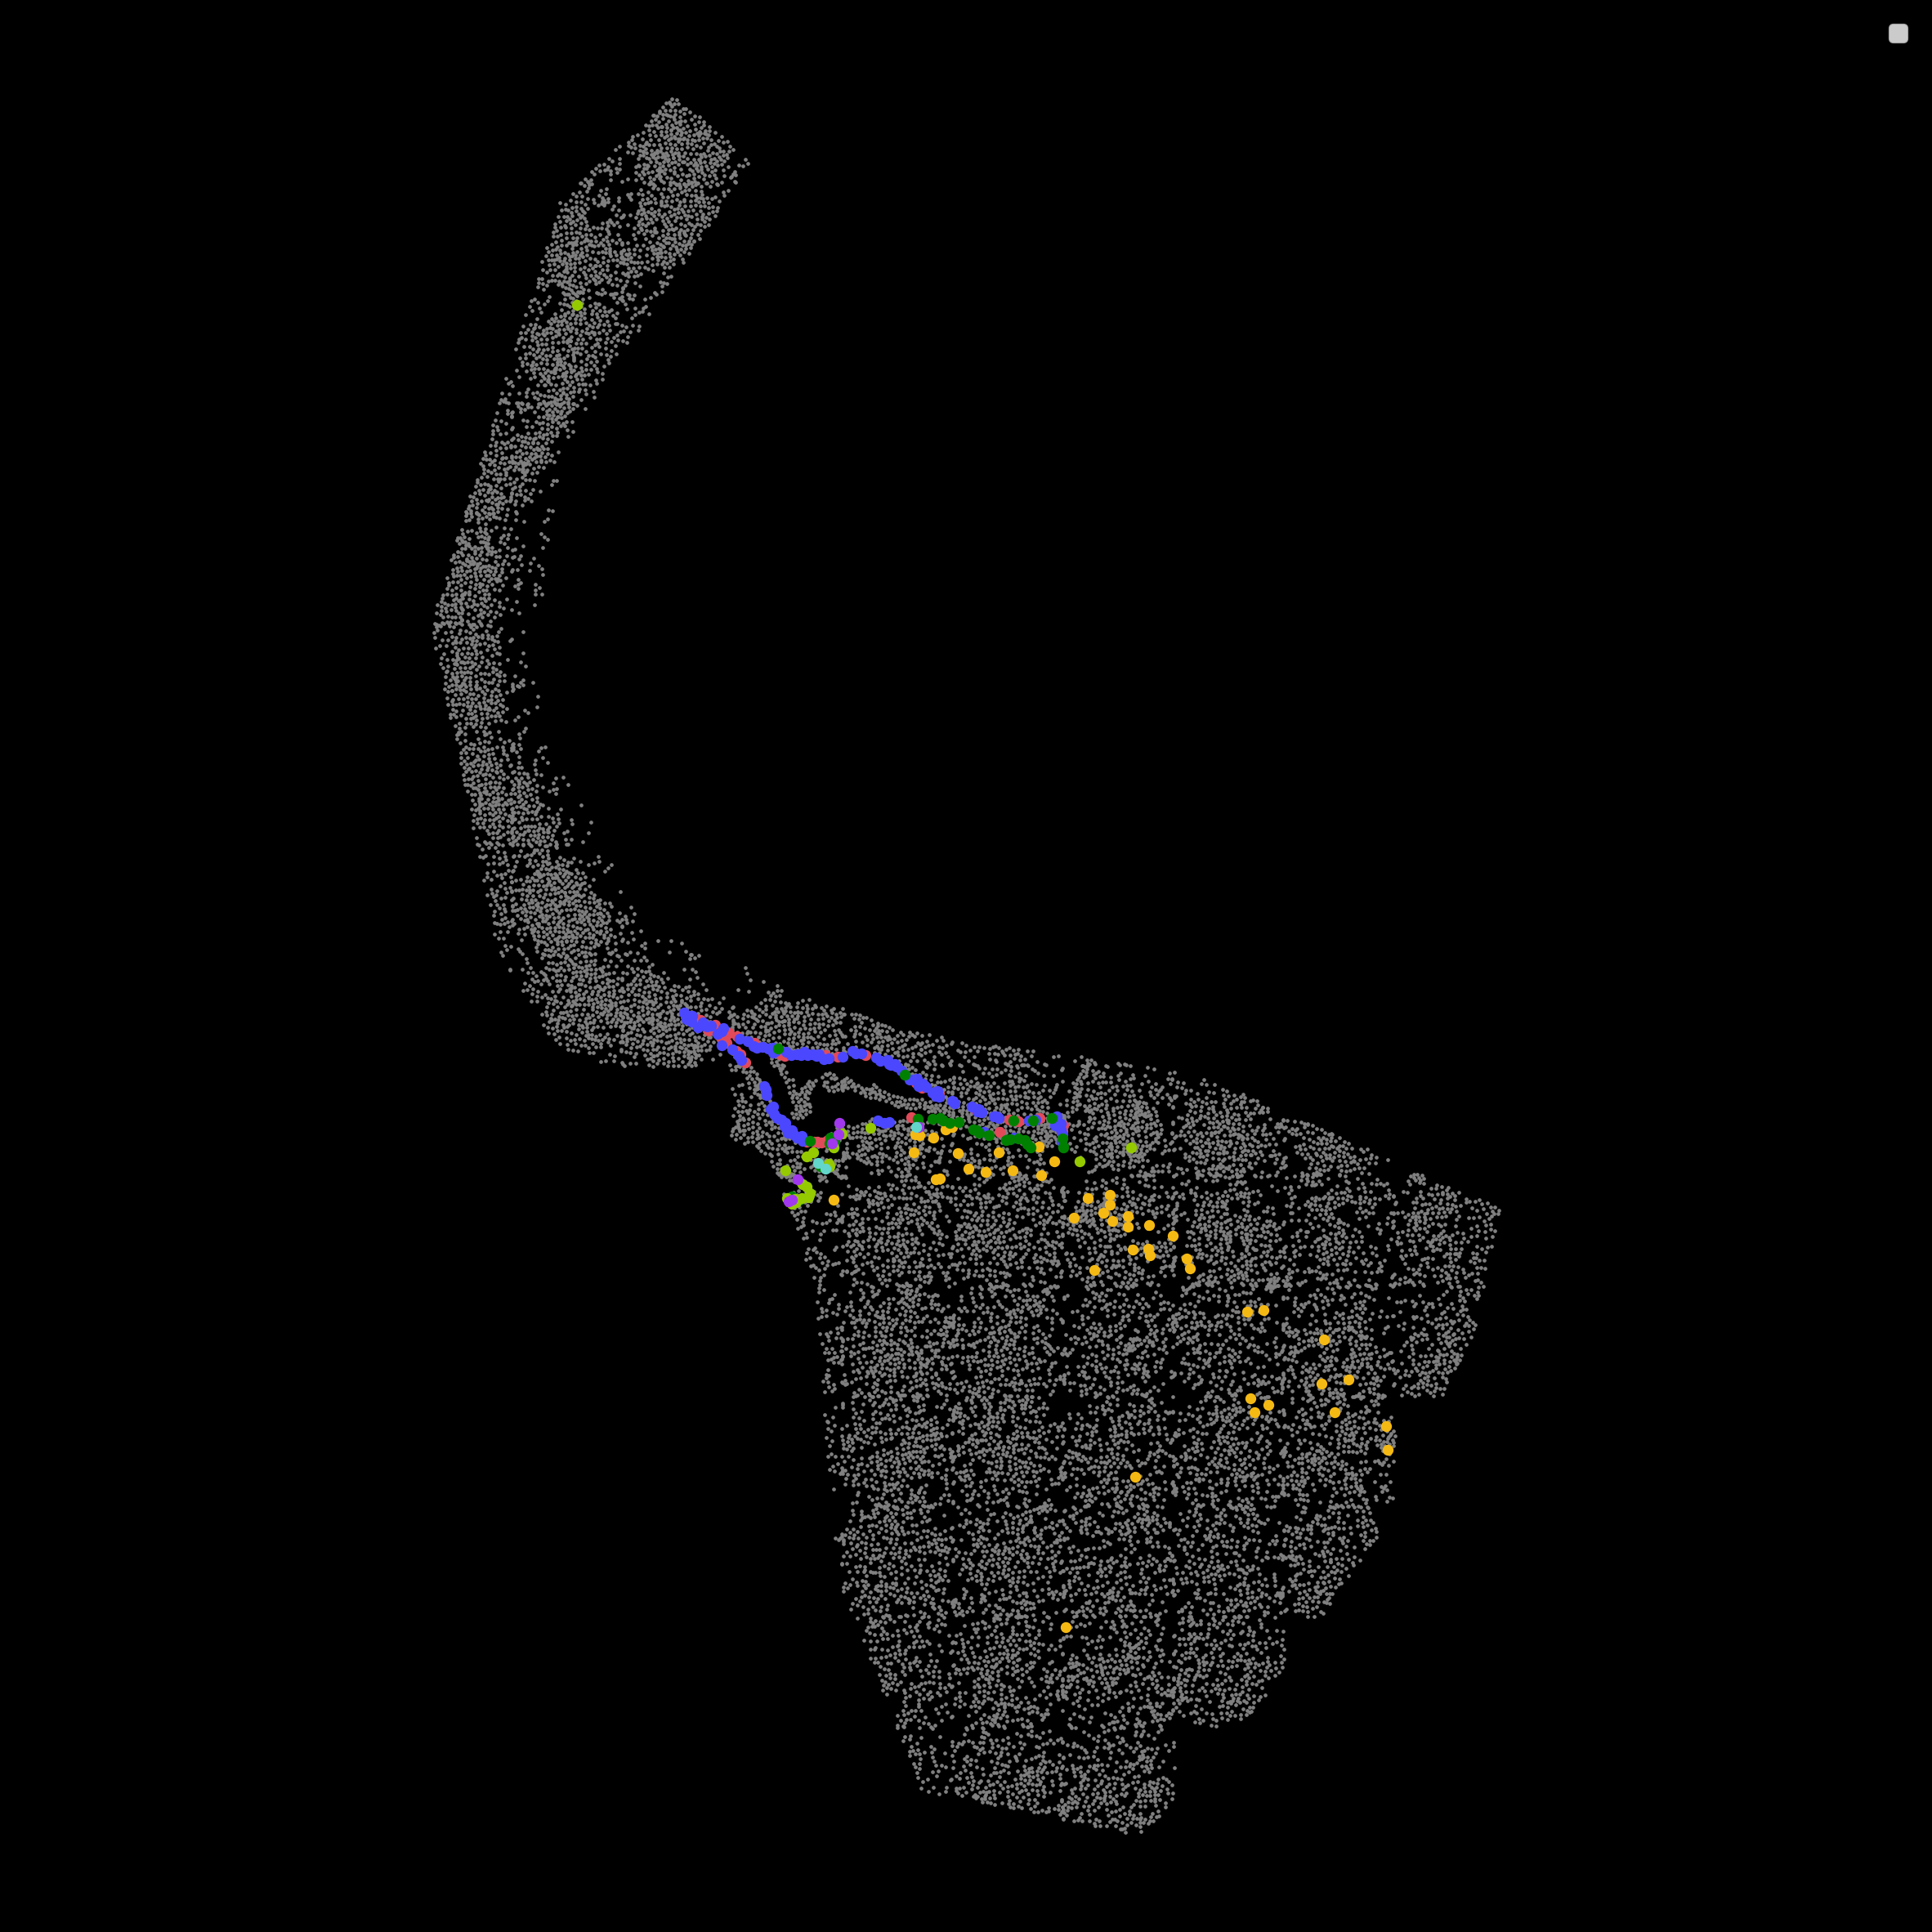

In [31]:
month1j.plot_cluster_scdata("neurogenesis_pathway", clusters=neu_groups, ref=month1, sbig=100)

### Ingest reference umap 

In [32]:
# ingest subset svz pathway to svz umap
d = month1j.get_cluster(neu_groups, group="neurogenesis_pathway").copy()

vars1 = list(d.var.index)
vars2 = list(refumap.var.index)
varsf = np.intersect1d(vars1,vars2)
print("Genes in common:",len(varsf))
d = d[:,varsf]
ref2 = refumap[:,varsf]
sc.pp.pca(d,n_comps=50)
sc.pp.pca(ref2,n_comps=50)
sc.tl.ingest(d,ref2,obs='leiden')

month1ing = d.copy()

Genes in common: 278
h3
Distances type: <class 'scipy.sparse._csr.csr_matrix'>


h1


/Users/kjenie/DataspellProjects/ptb_timepoints/.conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/kjenie/DataspellProjects/ptb_timepoints/.conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:369: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/Users/kjenie/DataspellProjects/ptb_timepoints/.conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:379: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/Users/kjenie/DataspellProjects/ptb_timepoints/.conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


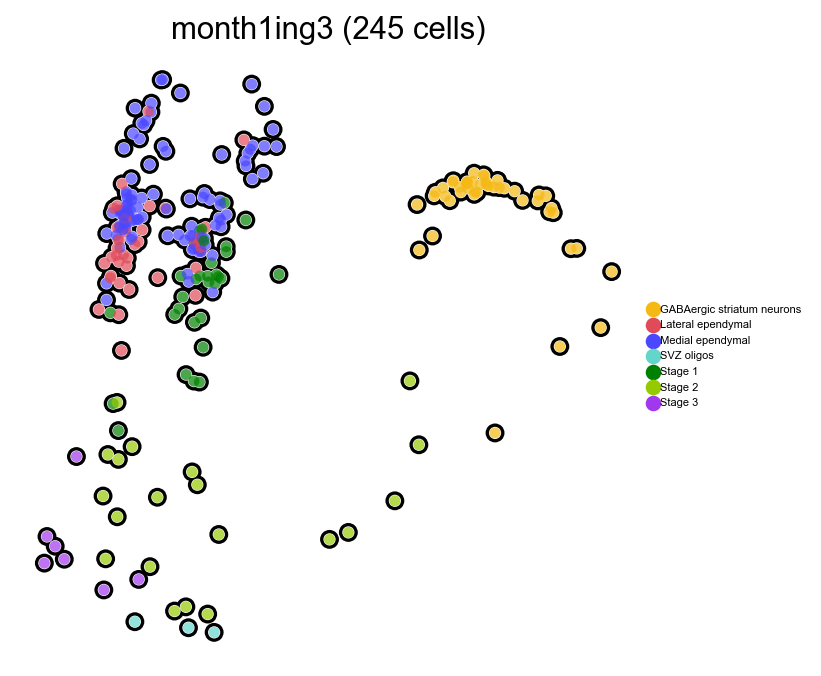

In [33]:
month1ingj = Jenie(month1ing, "month1ing3", "month1ing3", "neurogenesis_pathway")
month1ingj.umap("neurogenesis_pathway", fig=(5,5), size=100, legend="right margin")

/Users/kjenie/DataspellProjects/ptb_timepoints/.conda/lib/python3.10/site-packages/scanpy/plotting/_utils.py:430: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + '_colors'] = colors_list
/Users/kjenie/DataspellProjects/ptb_timepoints/.conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


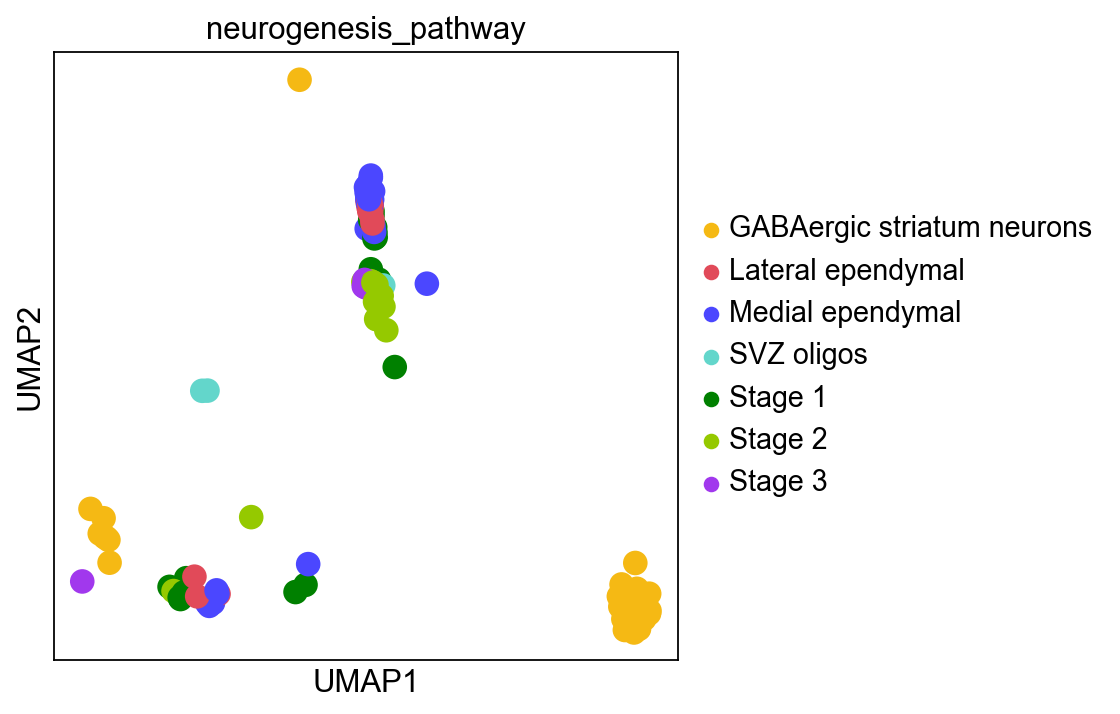

In [34]:
### NOT IN FIGURE
### only to set colors

submonth1 = month1j.data[month1j.data.obs["neurogenesis_pathway"].isin(neu_groups)]
submonth1j = Jenie(submonth1, "submonth1", "submonth1", "neurogenesis_pathway")
sc.pl.umap(submonth1j.data, color="neurogenesis_pathway", palette=Jenie.get_pallete("neurogenesis_pathway"))

### PAGA analysis

/Users/kjenie/DataspellProjects/ptb_timepoints/.conda/lib/python3.10/site-packages/scanpy/tools/_paga.py:122: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns['paga'] = {}


/Users/kjenie/DataspellProjects/ptb_timepoints/.conda/lib/python3.10/site-packages/scanpy/neighbors/__init__.py:924: RuntimeWarning: divide by zero encountered in divide
  Q = scipy.sparse.spdiags(1.0 / q, 0, W.shape[0], W.shape[0])
/Users/kjenie/DataspellProjects/ptb_timepoints/.conda/lib/python3.10/site-packages/scanpy/neighbors/__init__.py:934: RuntimeWarning: divide by zero encountered in divide
  self.Z = scipy.sparse.spdiags(1.0 / z, 0, K.shape[0], K.shape[0])
/Users/kjenie/DataspellProjects/ptb_timepoints/.conda/lib/python3.10/site-packages/scanpy/_utils/__init__.py:434: RuntimeWarning: invalid value encountered in subtract
  ret[n:] = ret[n:] - ret[:-n]
/Users/kjenie/DataspellProjects/ptb_timepoints/.conda/lib/python3.10/site-packages/scanpy/plotting/_tools/paga.py:1229: UserWarning: FixedFormatter should only be used together with FixedLocator
  groups_axis.set_yticklabels(['', xlabel, ''], fontsize=ytick_fontsize)
/Users/kjenie/DataspellProjects/ptb_timepoints/.conda/lib/pyth

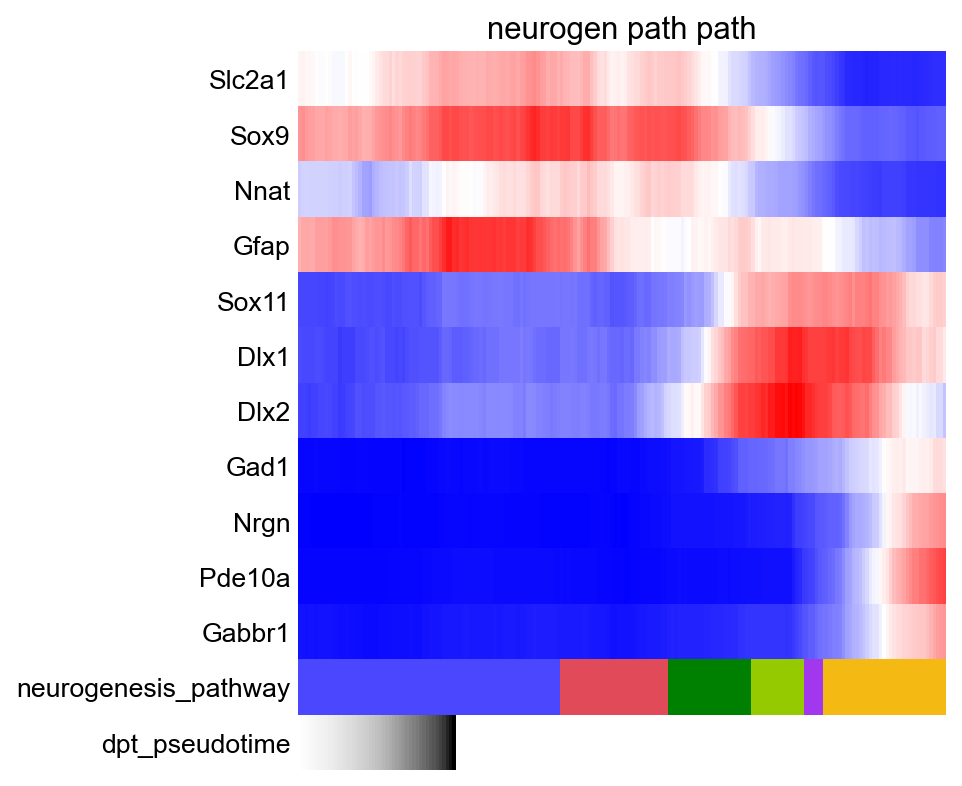

In [35]:
# paga analysis
minmaxgenes = {
    'Slc2a1': [0, 78],
    'Sox9': [0, 55],
    'Nnat': [0, 112],
    'Gfap': [0, 129],
    'Sox11': [0, 11],
    'Dlx1': [0, 5],
    'Dlx2': [0, 12],
    'Gad1': [0, 24],
    'Nrgn': [0, 45],
    'Pde10a': [0, 222],
    'Gabbr1': [0, 73]
 }

gene_names = list(minmaxgenes.keys())

     

d = submonth1j.data.copy()



in_path = np.in1d(d.obs[group],path)
locs = [d.var.index.get_loc(gene) for gene in gene_names]
#Ns = np.sum(d.obsm["X_raw"][in_path],axis=-1)[:,np.newaxis]
#rawcellgenes = d.obsm["X_raw"][in_path][:,locs]/Ns*np.median(Ns)
#rawcellgenes = d.obsm["X_raw"][in_path][:,locs]
# vol = d.obsm['volume'][in_path]
rawcellgenes = d.obsm["X_raw"][in_path][:,:]
# rawcellgenes = rawcellgenes/vol*np.median(vol) ### norm by volume
# Ns = np.sum(rawcellgenes,axis=-1)[:,np.newaxis]
#rawcellgenes = rawcellgenes/Ns*np.median(Ns) ### norm by total counts
rawcellgenes = rawcellgenes[:,locs]

normcellgenes = d.obsm["X_raw"][in_path][:,locs]


for ign in range(rawcellgenes.shape[1]):
    gn = gene_names[ign]
    min_,max_ = minmaxgenes[gn]
    normcellgenes[:,ign] = np.clip((rawcellgenes[:,ign] - min_)/(max_-min_),0,1)


d = d[in_path]
d = d[:, gene_names]

d.X = normcellgenes#np.exp(d.X)-1


descr = 'neurogen path'

sc.tl.paga(d, groups=group)
sc.tl.diffmap(d)
d.uns['iroot'] = np.flatnonzero(d.obs[group]  == "Medial ependymal")[1] ###############starting points
sc.tl.dpt(d)

_, data = sc.pl.paga_path(
        d, path, gene_names,
        show_node_names=False,
        ytick_fontsize=12,
        left_margin=0.15,
        n_avg=50,
        # annotations=['pseudotime'],
        show_yticks=True,
        show_colorbar=False,
        color_map='bwr',
        groups_key=group,
        color_maps_annotations={'pseudotime': 'viridis'},
        title='{} path'.format(descr),
        return_data=True,
        show=False)